# Notebook "mainCOG" — Maneuver Detection and Summary (COG/SOG)

This notebook automatically scans a directory of GPS runs, detects sailing maneuvers (tacks, jibes, buoy roundings) based on variations in **Course Over Ground (COG)** and **Speed Over Ground (SOG)**, visualizes trajectories and maneuver segments, and produces a **JSON summary** for each run. Each **run folder** must contain **exactly 1 CSV file** (otherwise the run is skipped) and the CSV filename (without extension) is used as the boat name.

---

## Workflow of this notebook

1. **Iterates over runs** (by date, sailor, run index).  
2. **Loads GPS/telemetry data** from CSV.  
3. **Detects COG change points** using rolling mean comparison.  
4. **Identifies SOG maneuvers** via local minima detection and filters (prominence, duration, TWA thresholds, entry speed, etc.).  
5. **Cross-validates maneuvers**: only SOG minima that coincide with significant COG changes are retained.  
6. **Applies manual skips** (some maneuvers are excluded by hand-picked indices).  
7. **Plots results**: trajectories with COG/SOG highlights, annotated maneuvers.  
8. **Appends results** into a global `summary` list.  
9. **Exports summary** as `summary.json`, containing all valid maneuvers per run.

---

## Output

- **Console logs** with details about analyzed runs and skipped maneuvers.  
- **Visual plots** for trajectories and maneuver segments.  
- **`summary.json` file** with structured results:

```json
[
  {
    "date": "08_06",
    "person": "Gian",
    "run": "08_06_Run1",
    "intervals": [
      {
        "maneuver_index": 1,
        "maneuver_time": 1686223456,
        "maneuver_type": "Tack",
        "duration": 12.5,
        "start_time": 1686223440,
        "end_time": 1686223452
      }
    ]
  }
]

Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\08_06\Gian\08_06_Run1


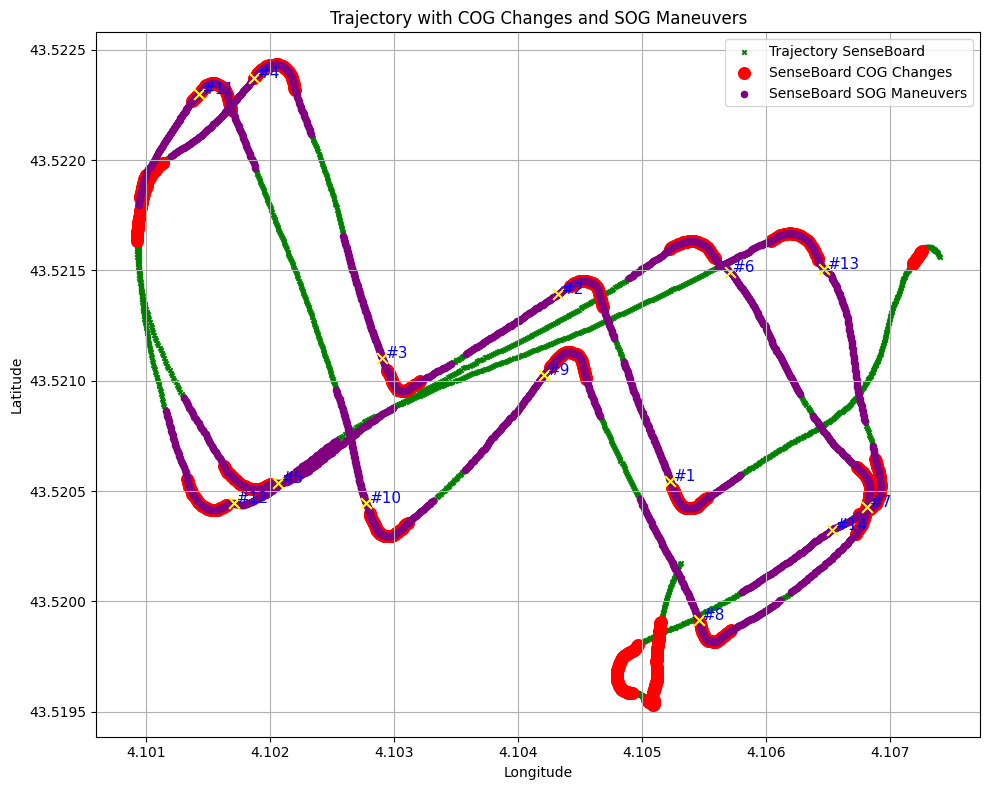

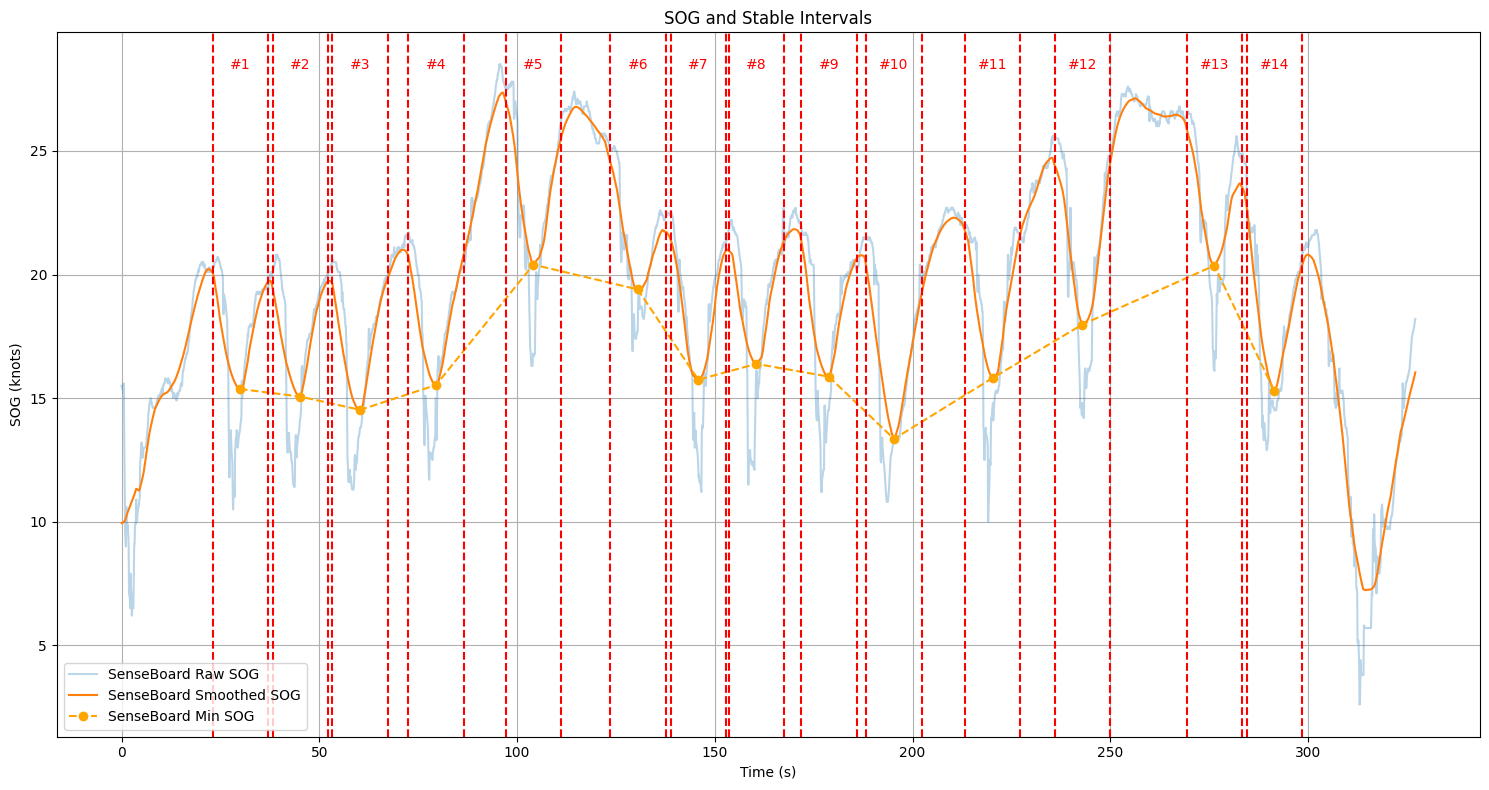

Skipped 2 maneuver(s) in Gian/08_06_Run1: indices: [7, 14]
Initial number of maneuvers: 14
Number of maneuvers selected: 12 






Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\08_06\Gian\08_06_Run2


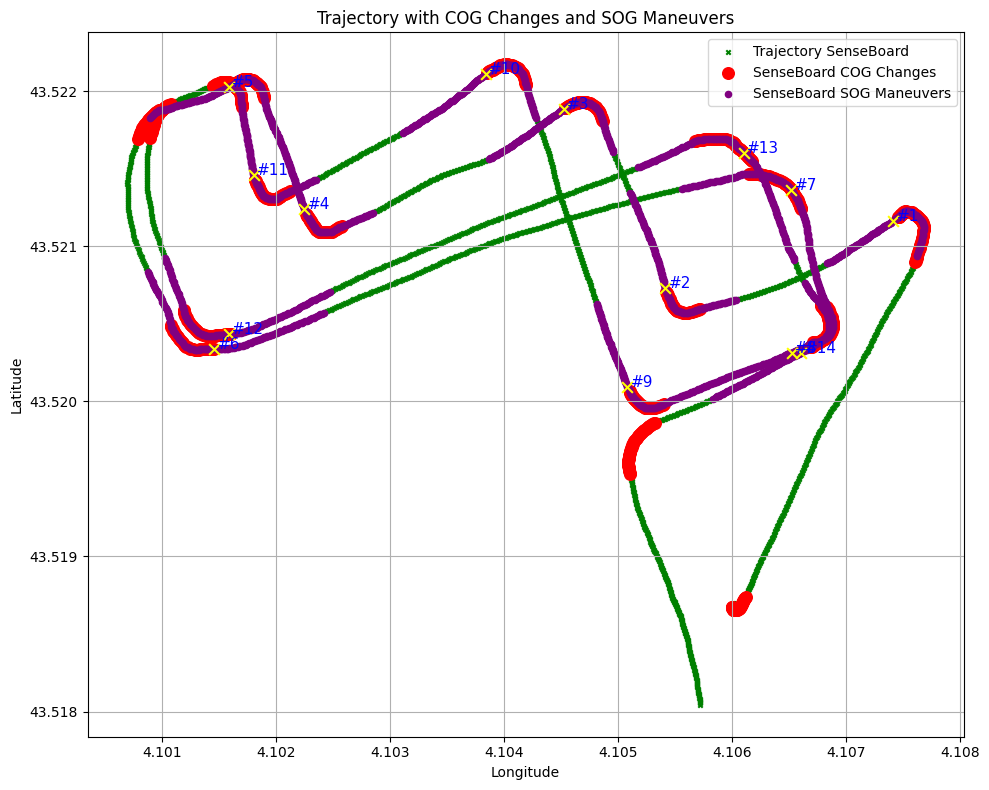

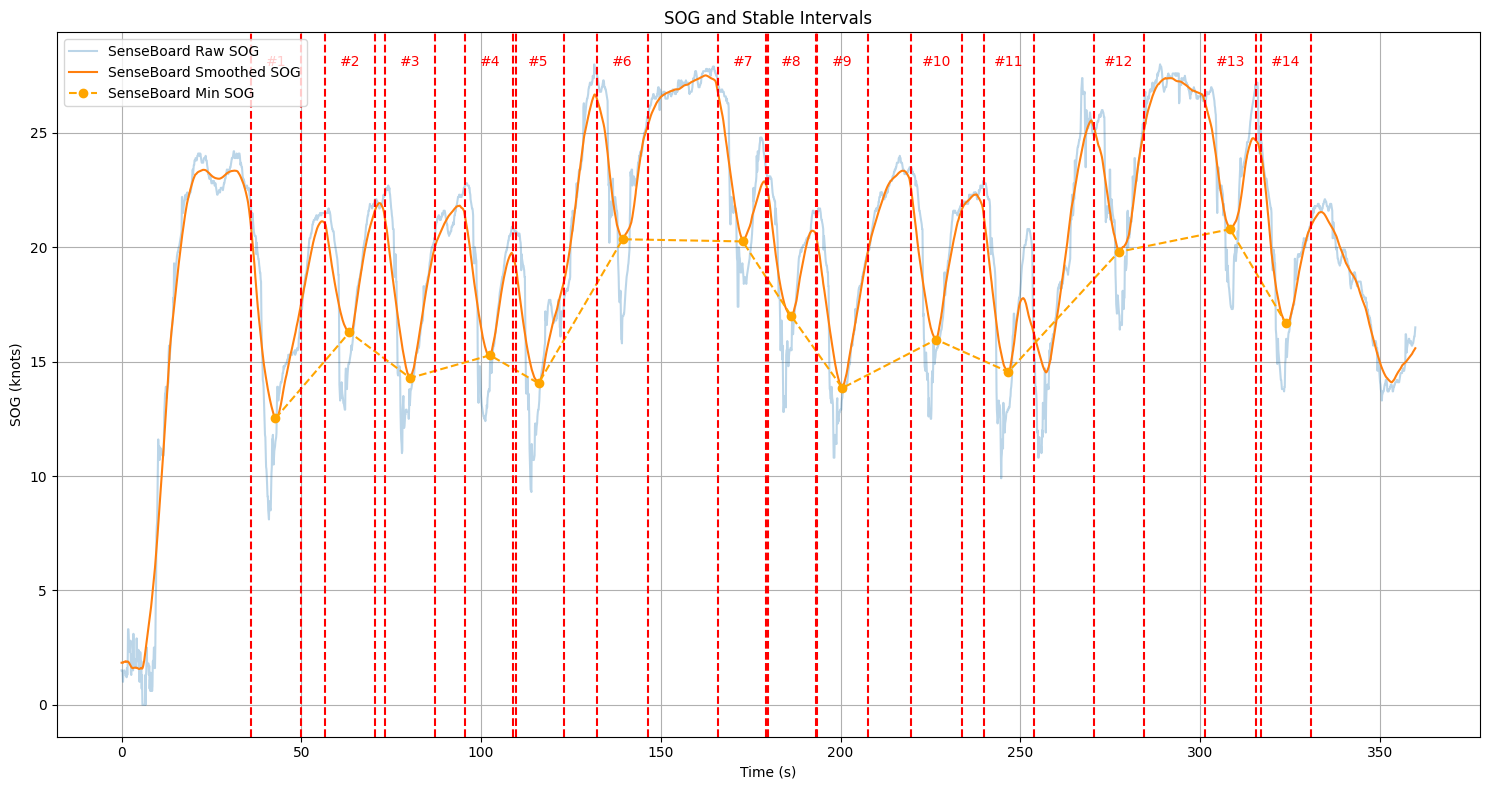

Skipped 3 maneuver(s) in Gian/08_06_Run2: indices: [1, 8, 14]
Initial number of maneuvers: 14
Number of maneuvers selected: 11 






Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\08_06\Gian\08_06_Run3


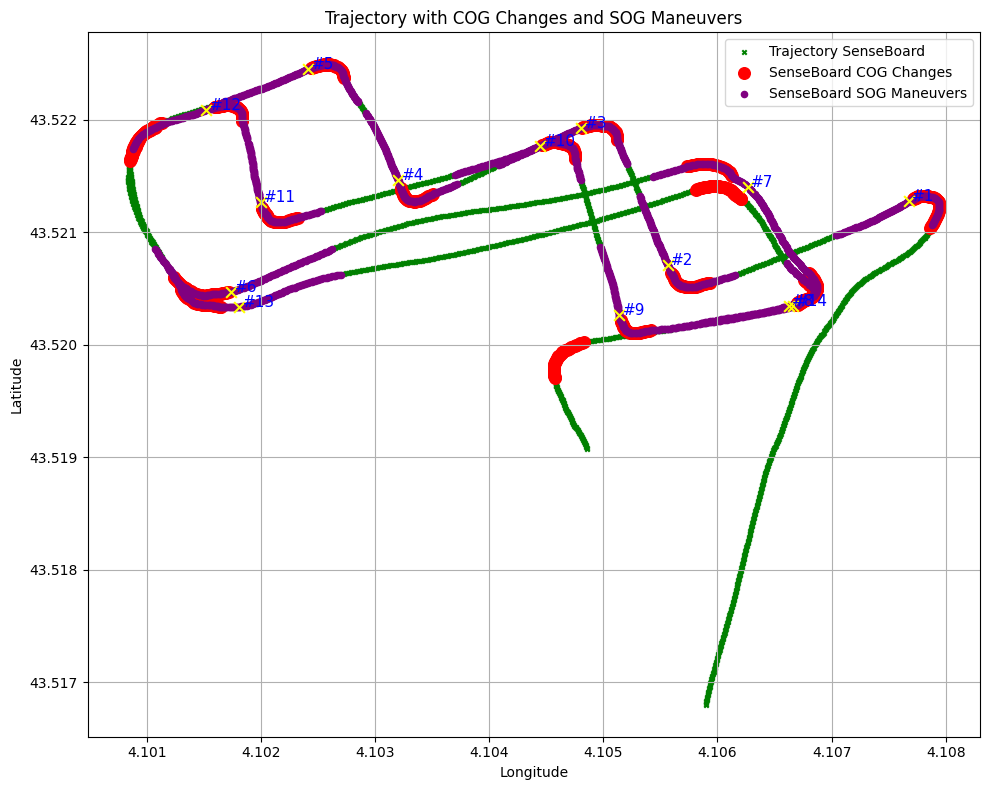

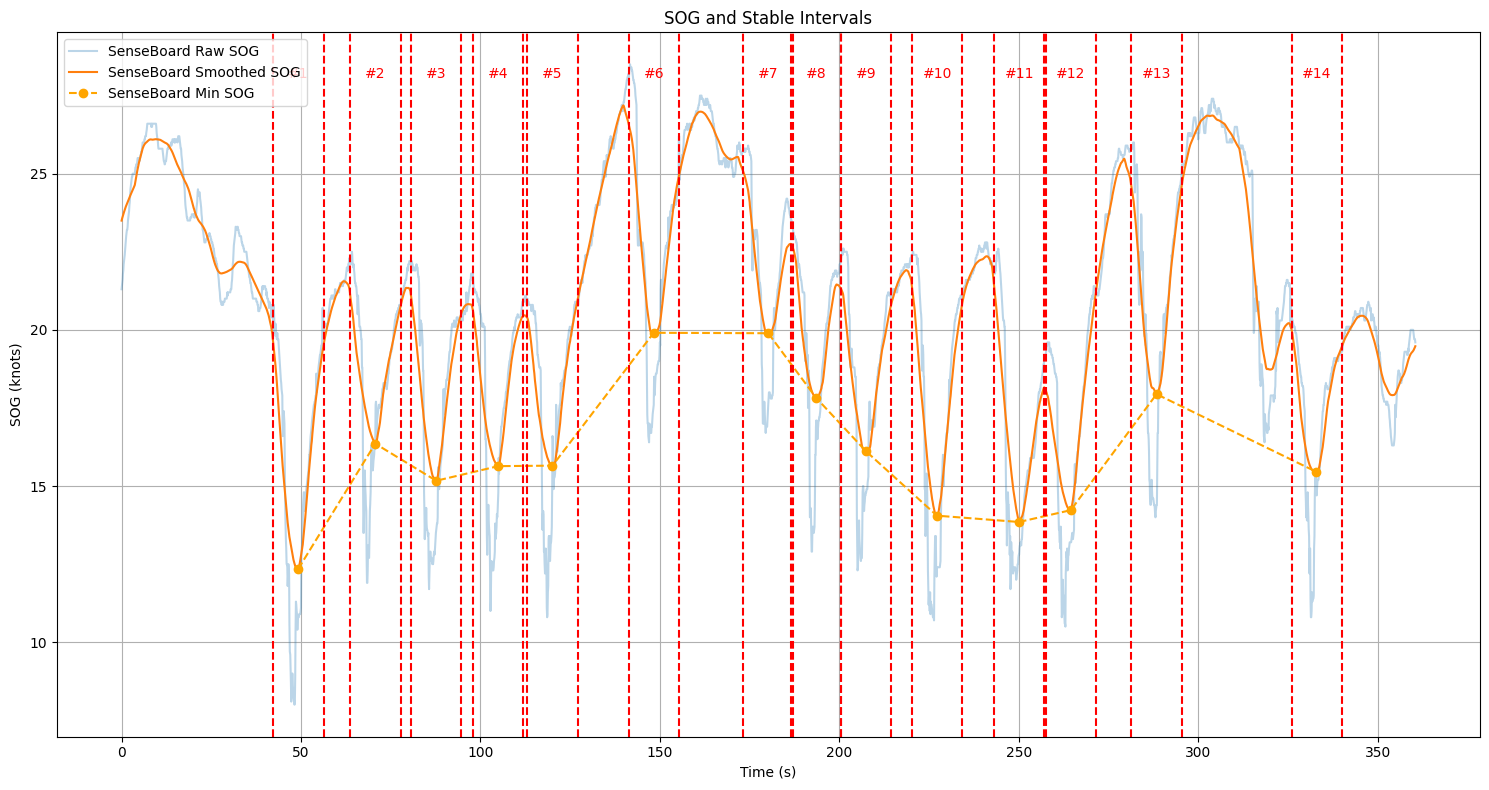

Skipped 3 maneuver(s) in Gian/08_06_Run3: indices: [1, 8, 14]
Initial number of maneuvers: 14
Number of maneuvers selected: 11 






Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\08_06\Gian\08_06_Run4


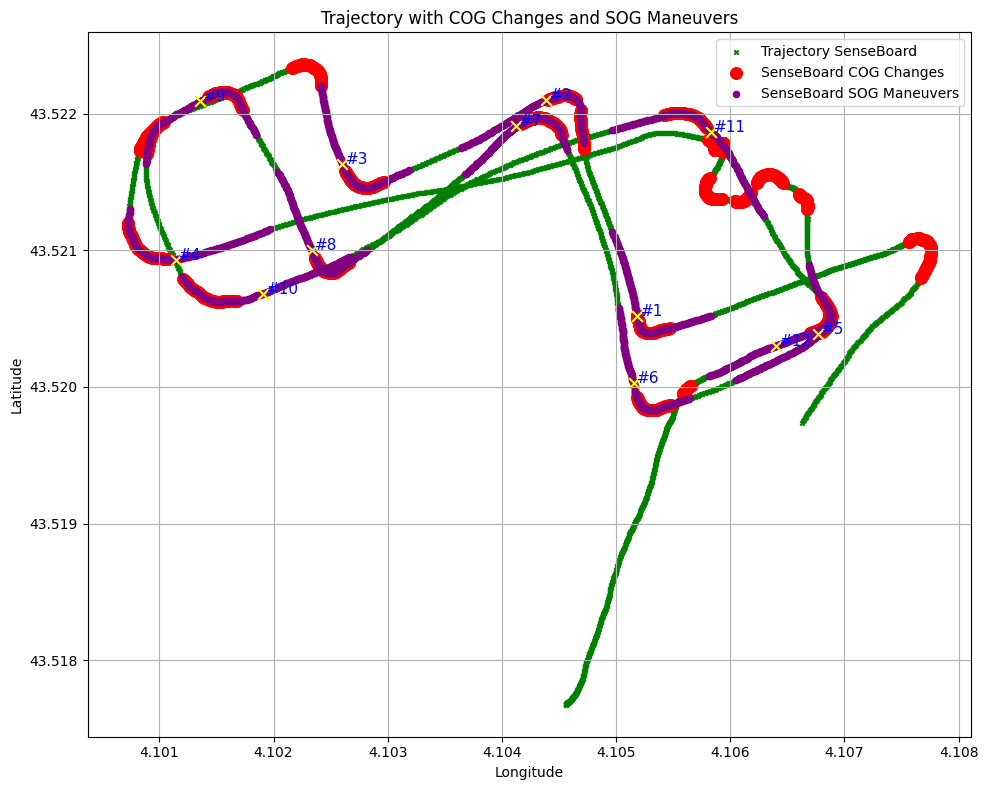

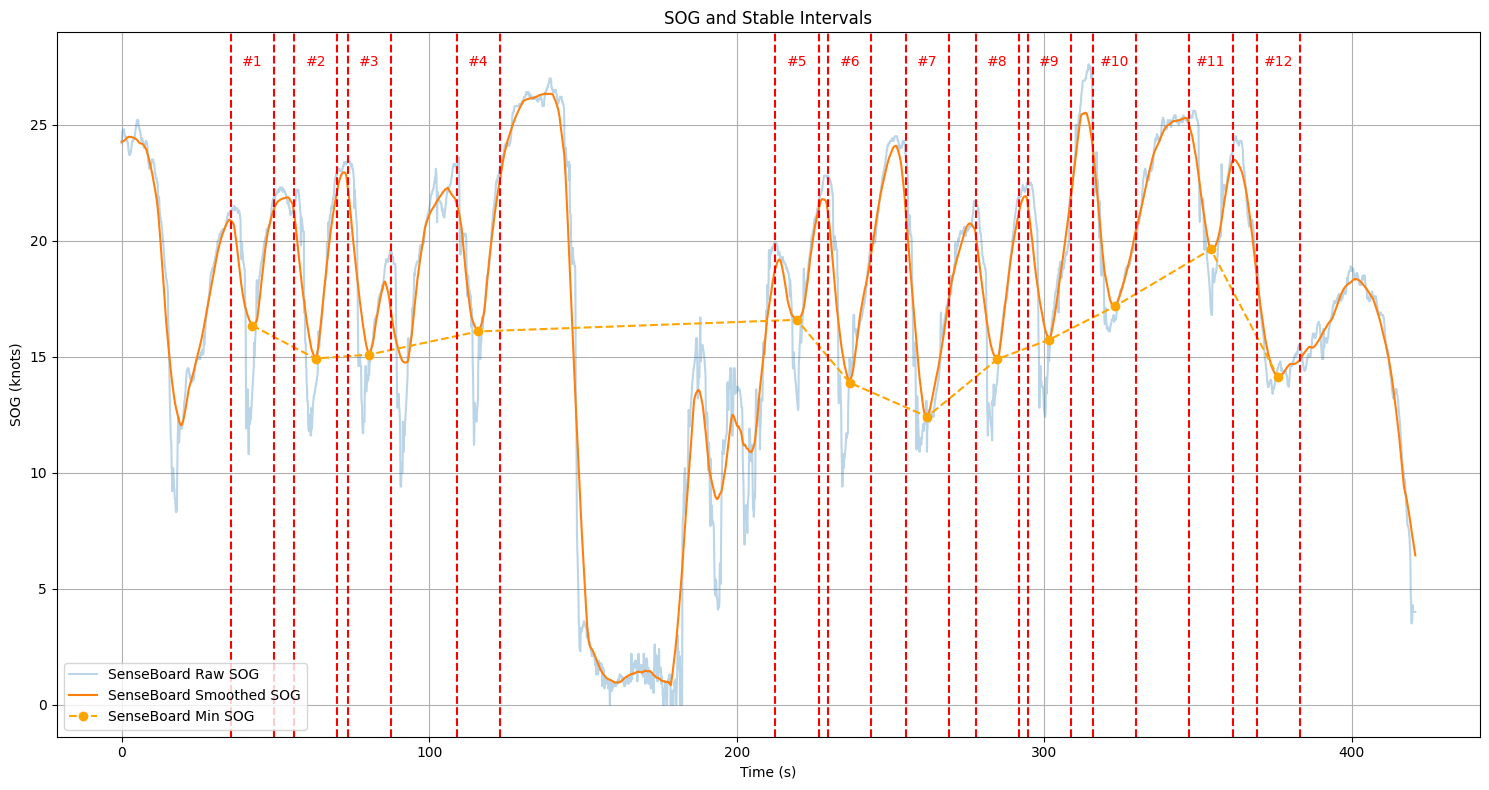

Skipped 2 maneuver(s) in Gian/08_06_Run4: indices: [5, 12]
Initial number of maneuvers: 12
Number of maneuvers selected: 10 






Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\08_06\Gian\08_06_Run5


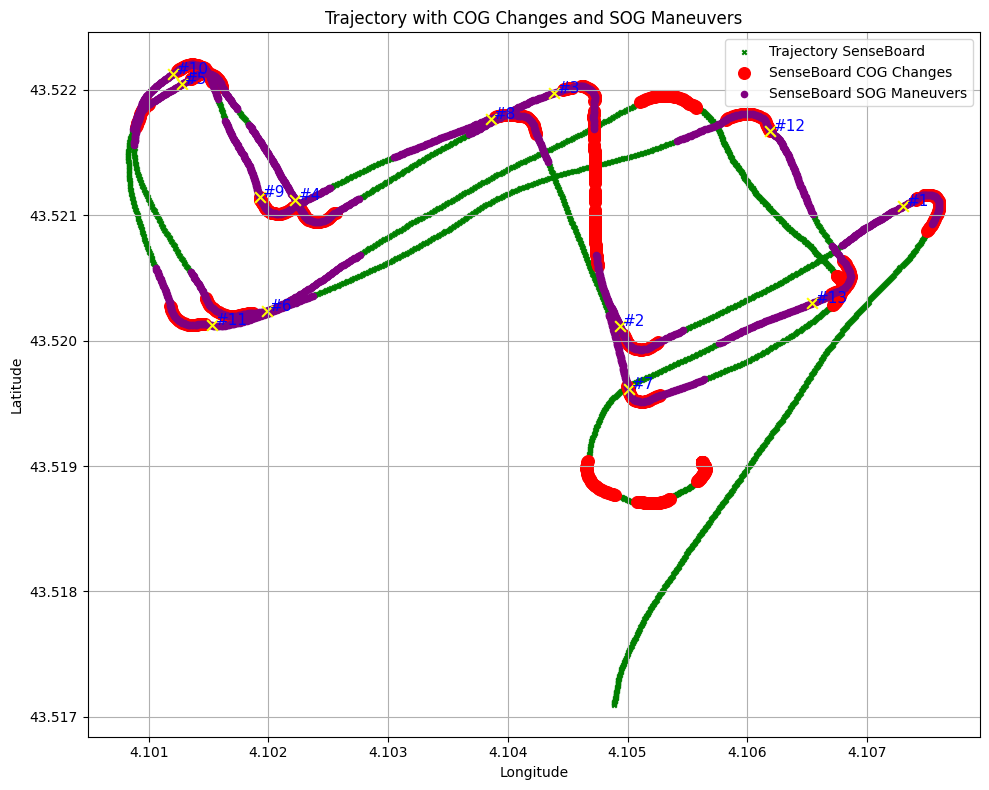

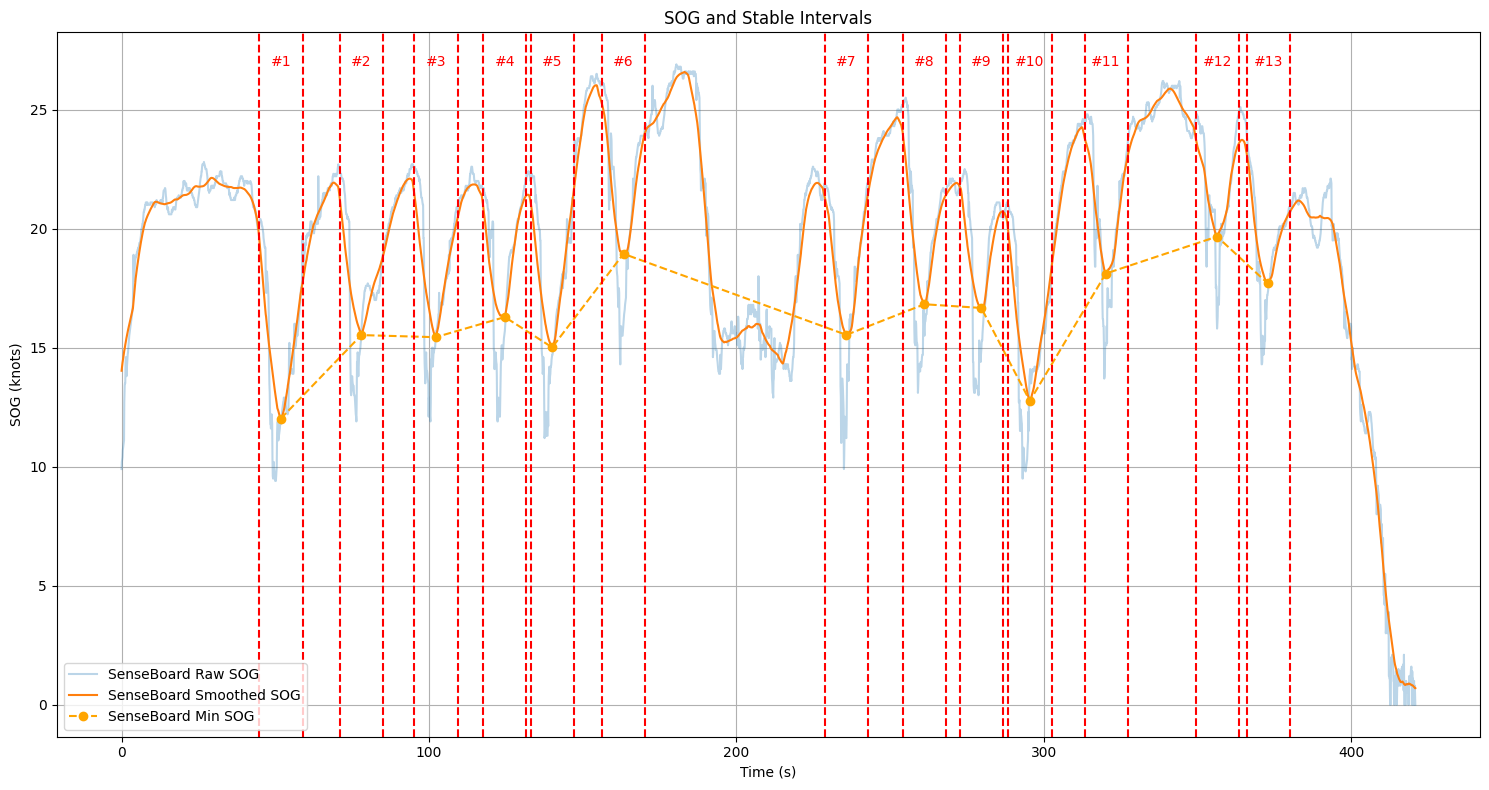

Skipped 2 maneuver(s) in Gian/08_06_Run5: indices: [1, 13]
Initial number of maneuvers: 13
Number of maneuvers selected: 11 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run1


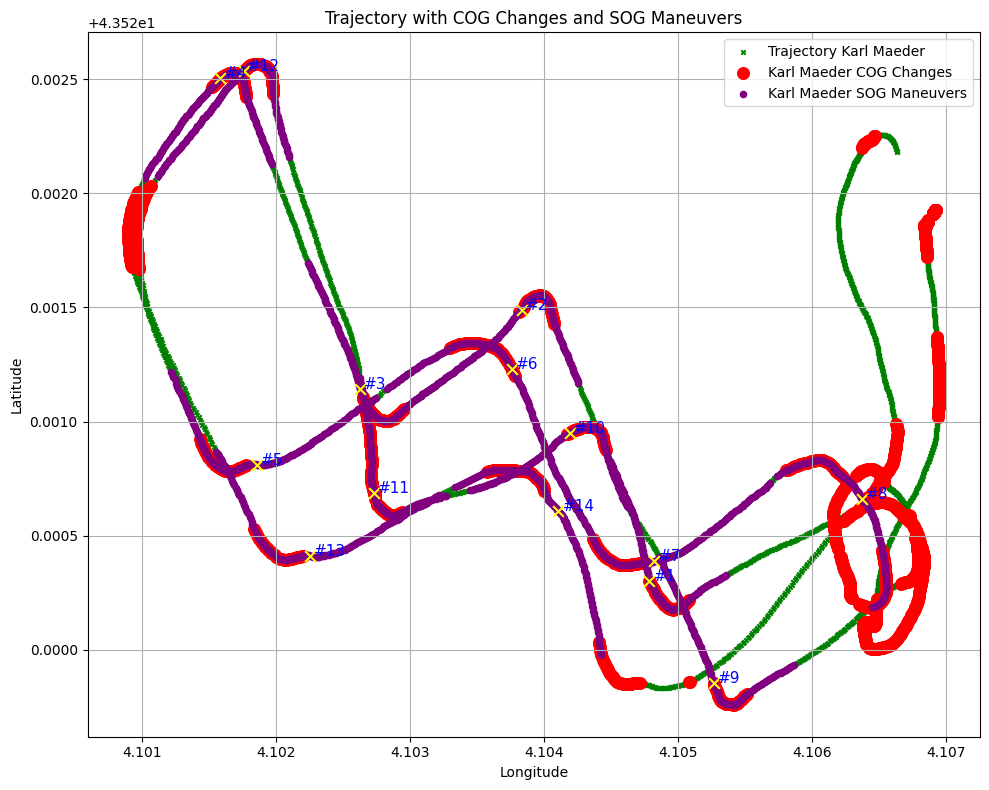

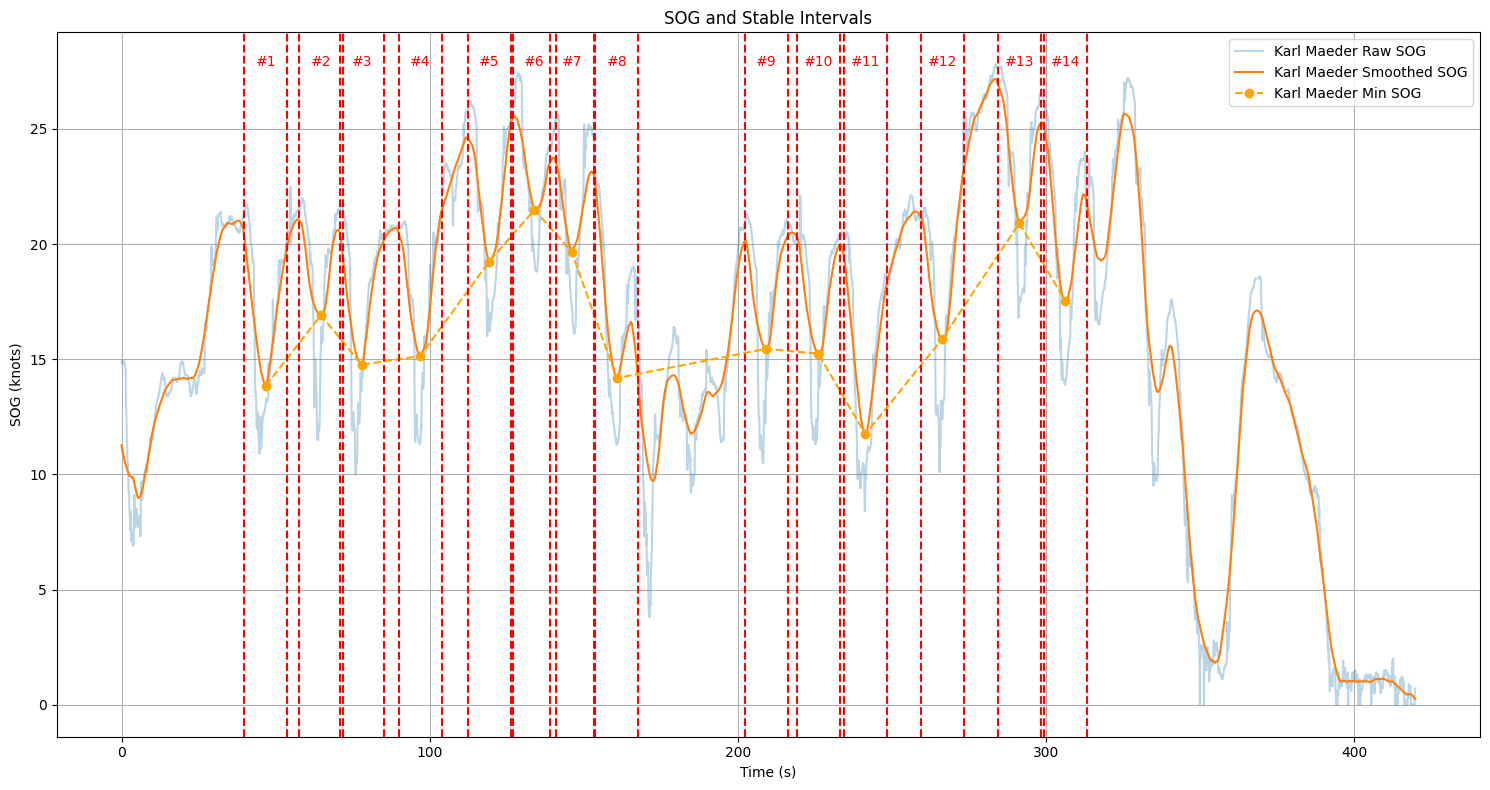

Skipped 1 maneuver(s) in Karl/08_06_Run1: indices: [8]
Initial number of maneuvers: 14
Number of maneuvers selected: 13 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run2


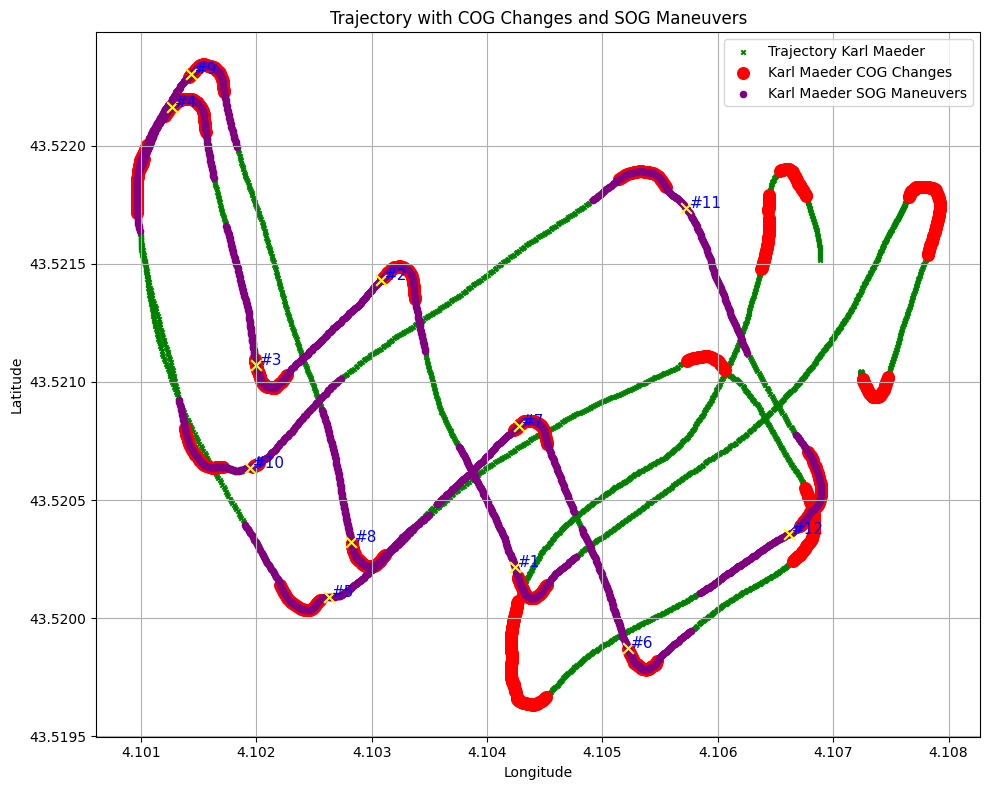

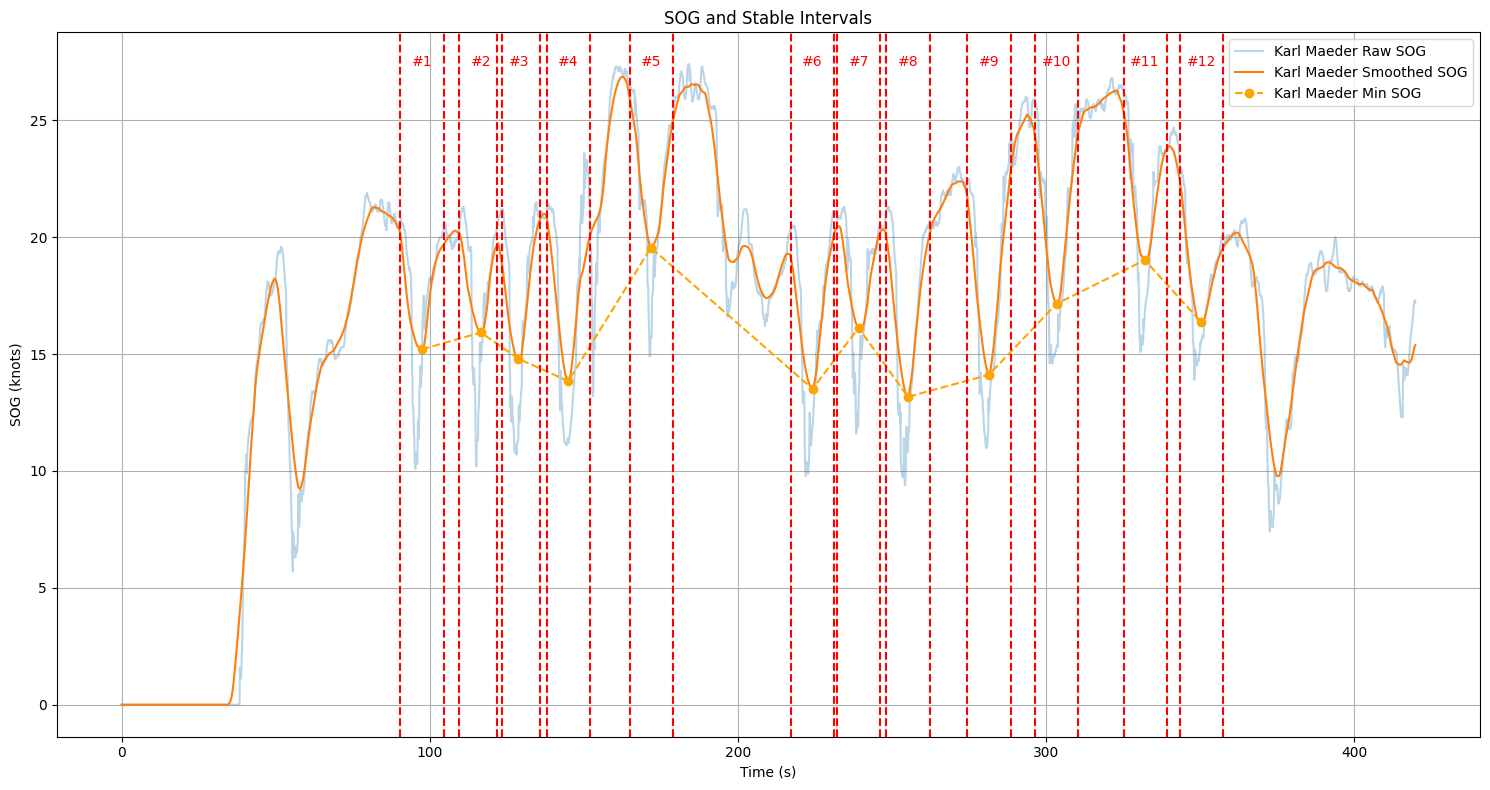

Skipped 1 maneuver(s) in Karl/08_06_Run2: indices: [12]
Initial number of maneuvers: 12
Number of maneuvers selected: 11 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run3


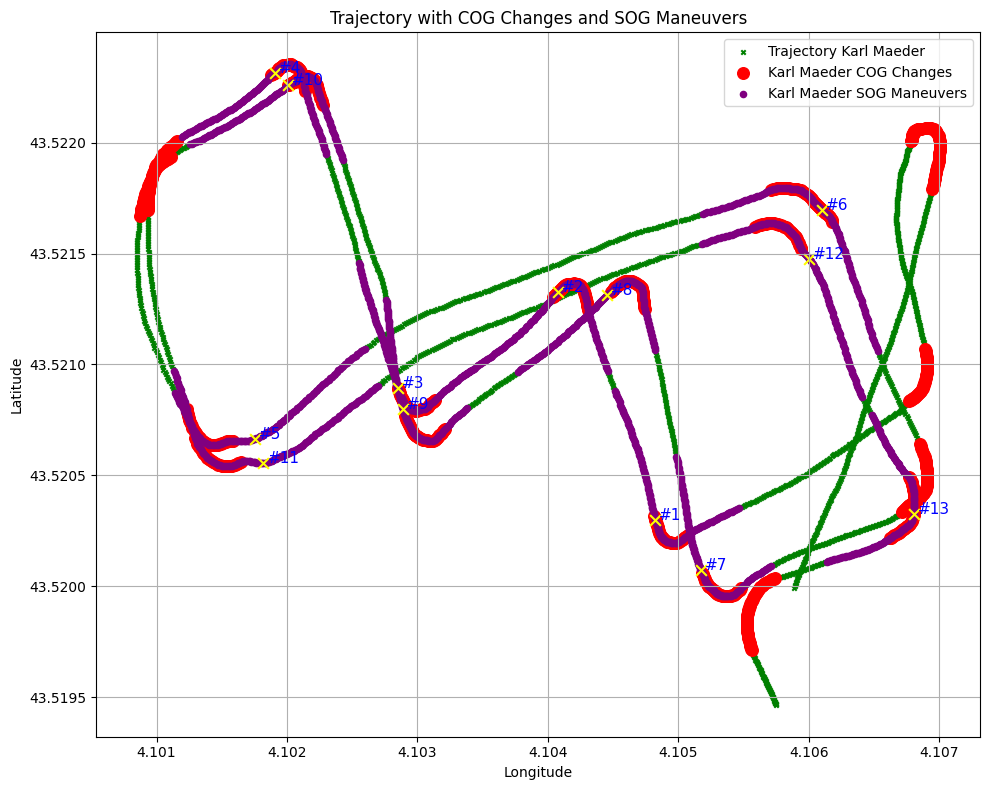

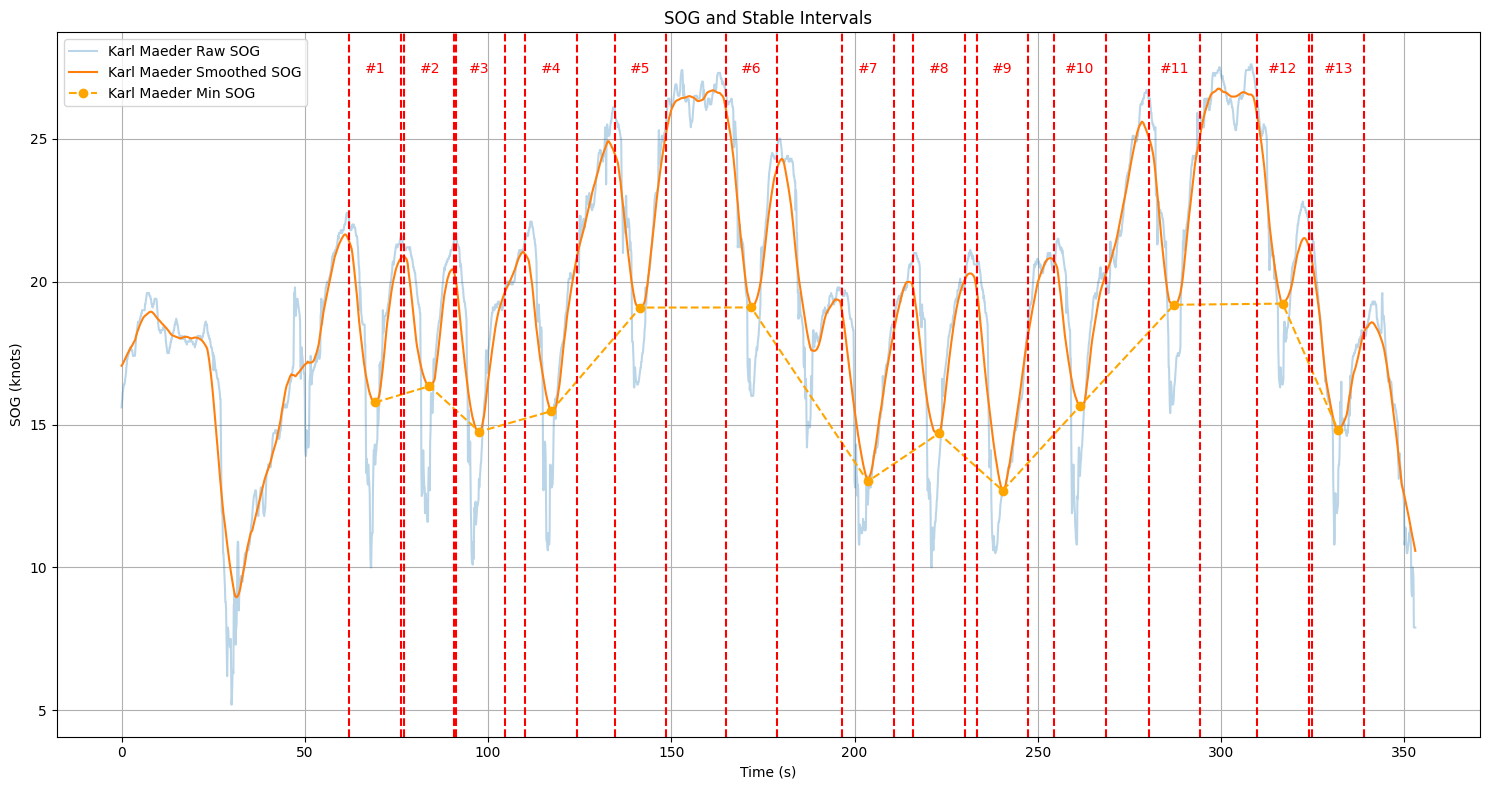

Skipped 1 maneuver(s) in Karl/08_06_Run3: indices: [13]
Initial number of maneuvers: 13
Number of maneuvers selected: 12 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run4


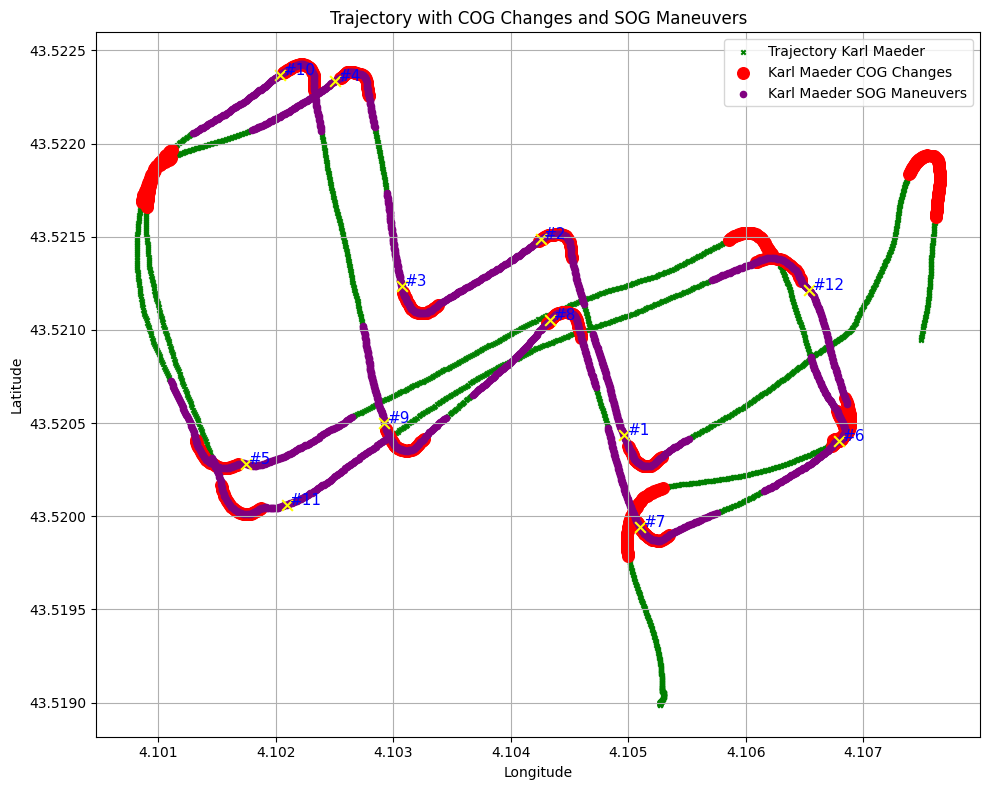

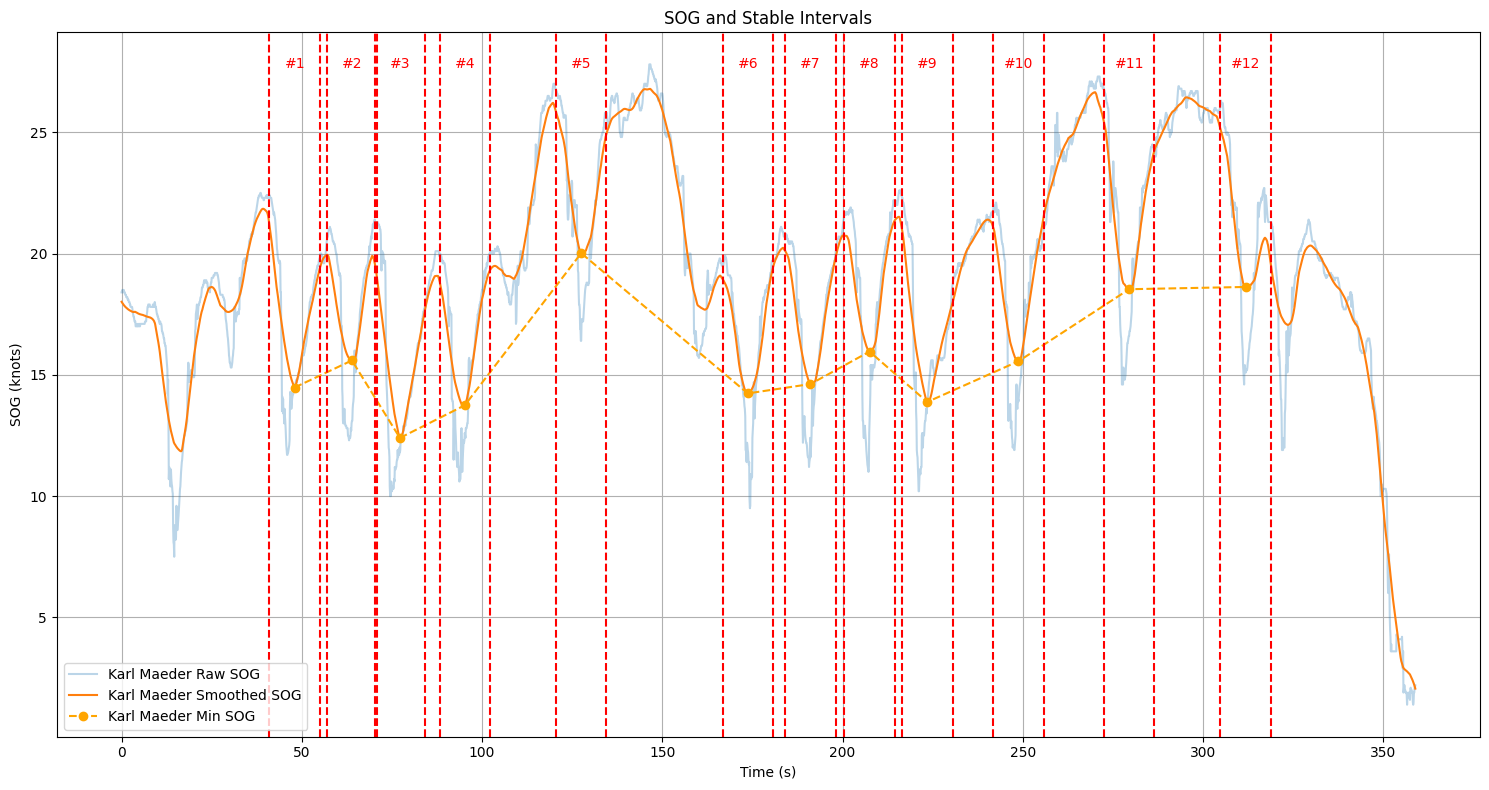

Skipped 1 maneuver(s) in Karl/08_06_Run4: indices: [6]
Initial number of maneuvers: 12
Number of maneuvers selected: 11 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run5


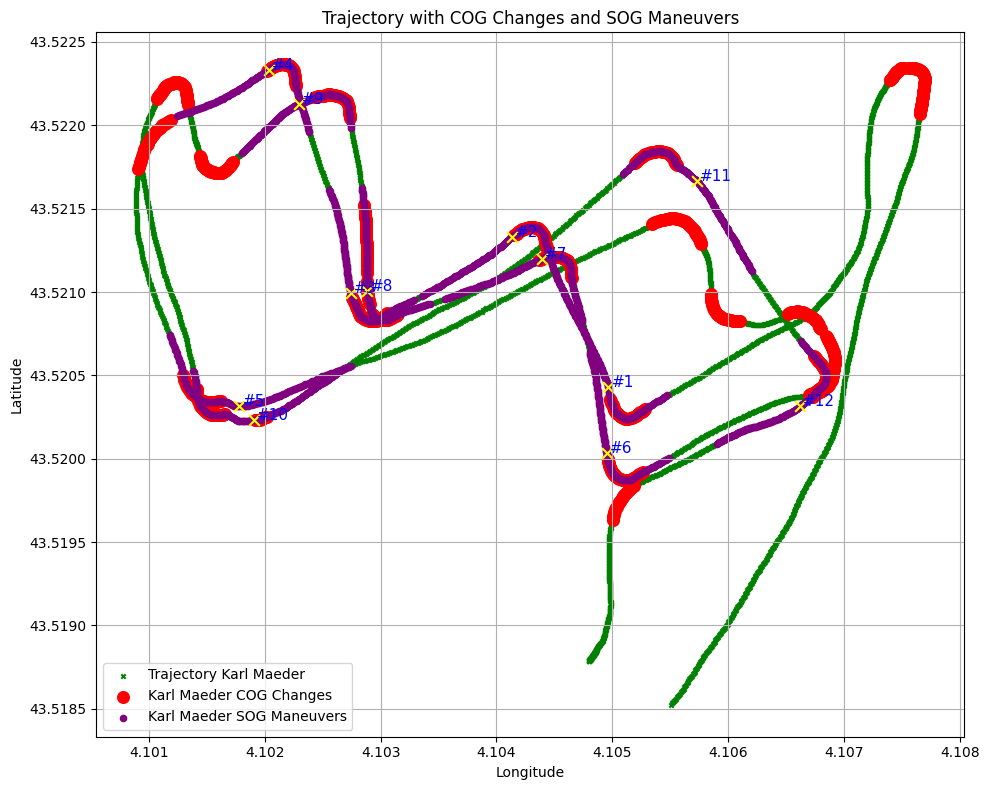

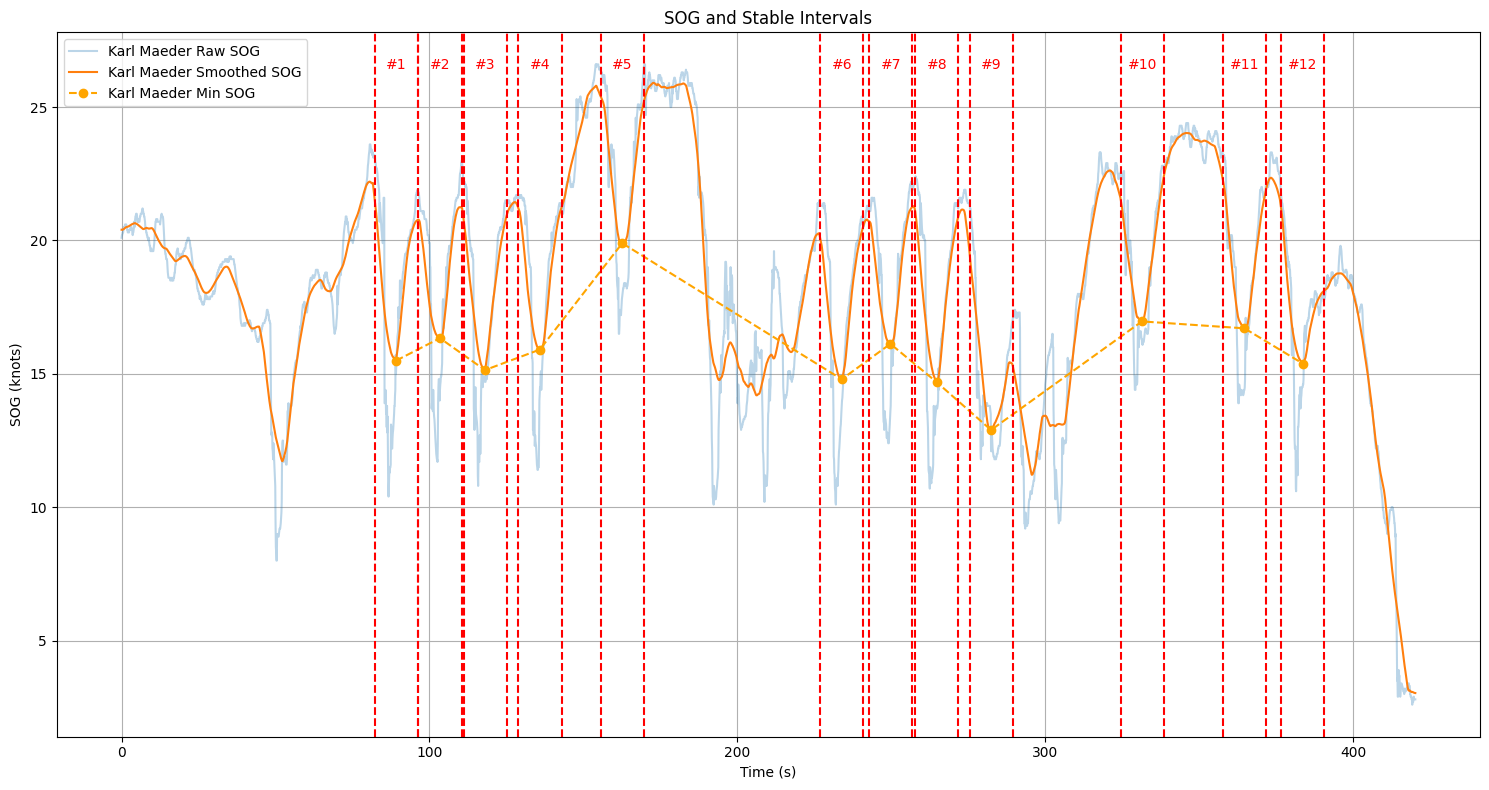

Skipped 1 maneuver(s) in Karl/08_06_Run5: indices: [12]
Initial number of maneuvers: 12
Number of maneuvers selected: 11 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\08_06\Karl\08_06_Run6


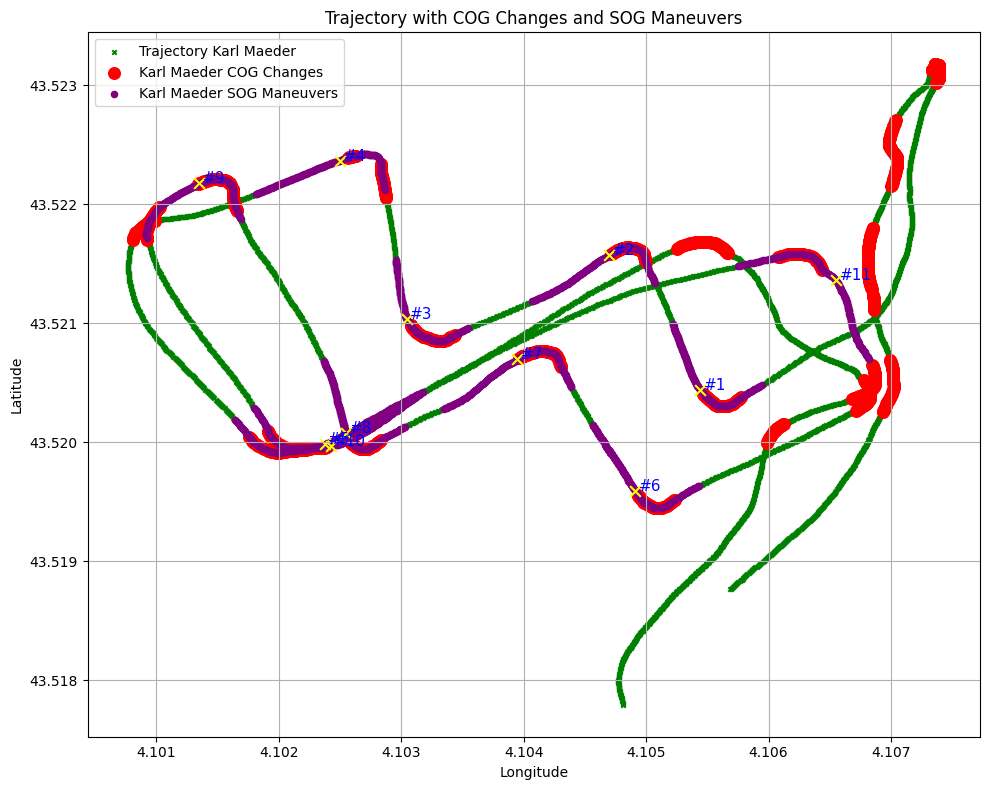

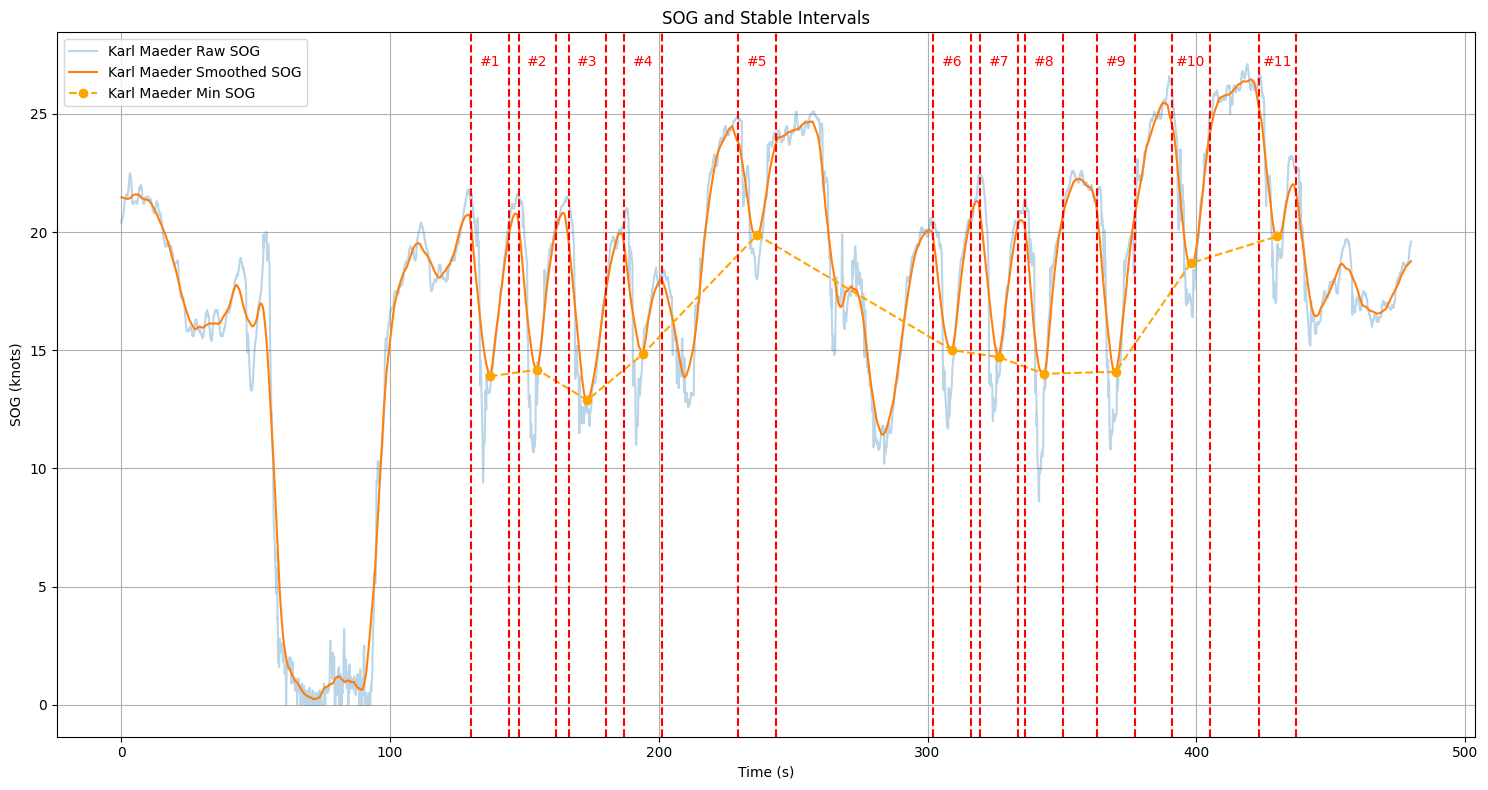

Number of maneuvers selected: 11 






Analyse: Gian Stragiotti.csv dans ../Data_Sailnjord/Maneuvers\11_06\Gian\11_06_Run1


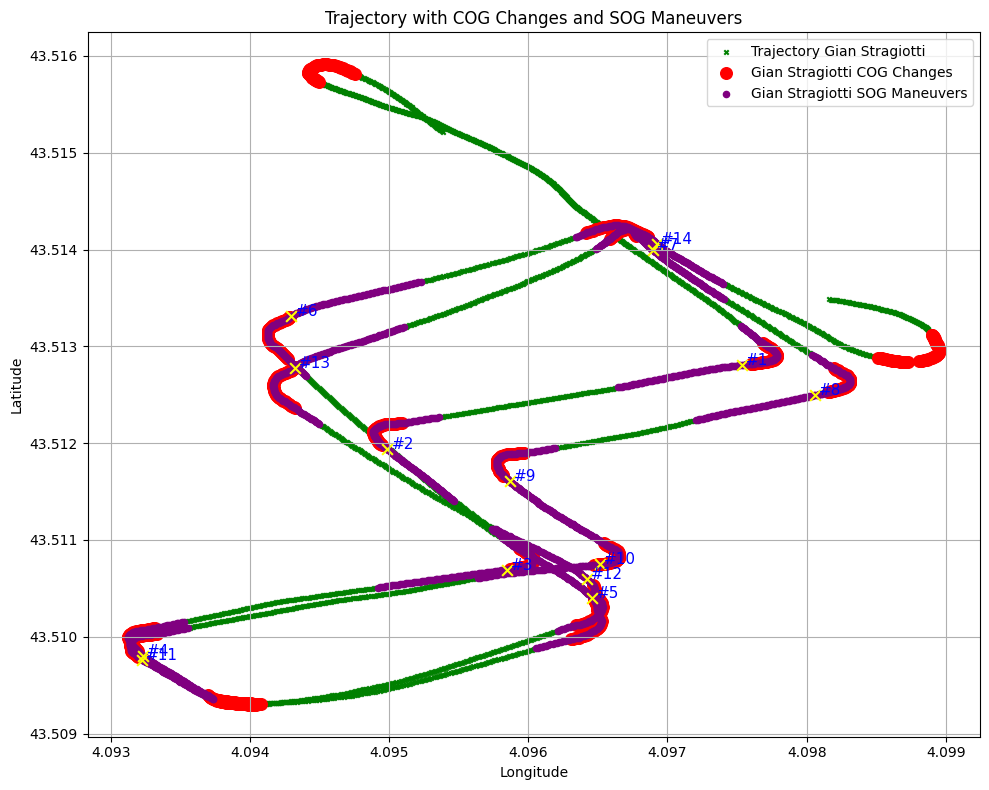

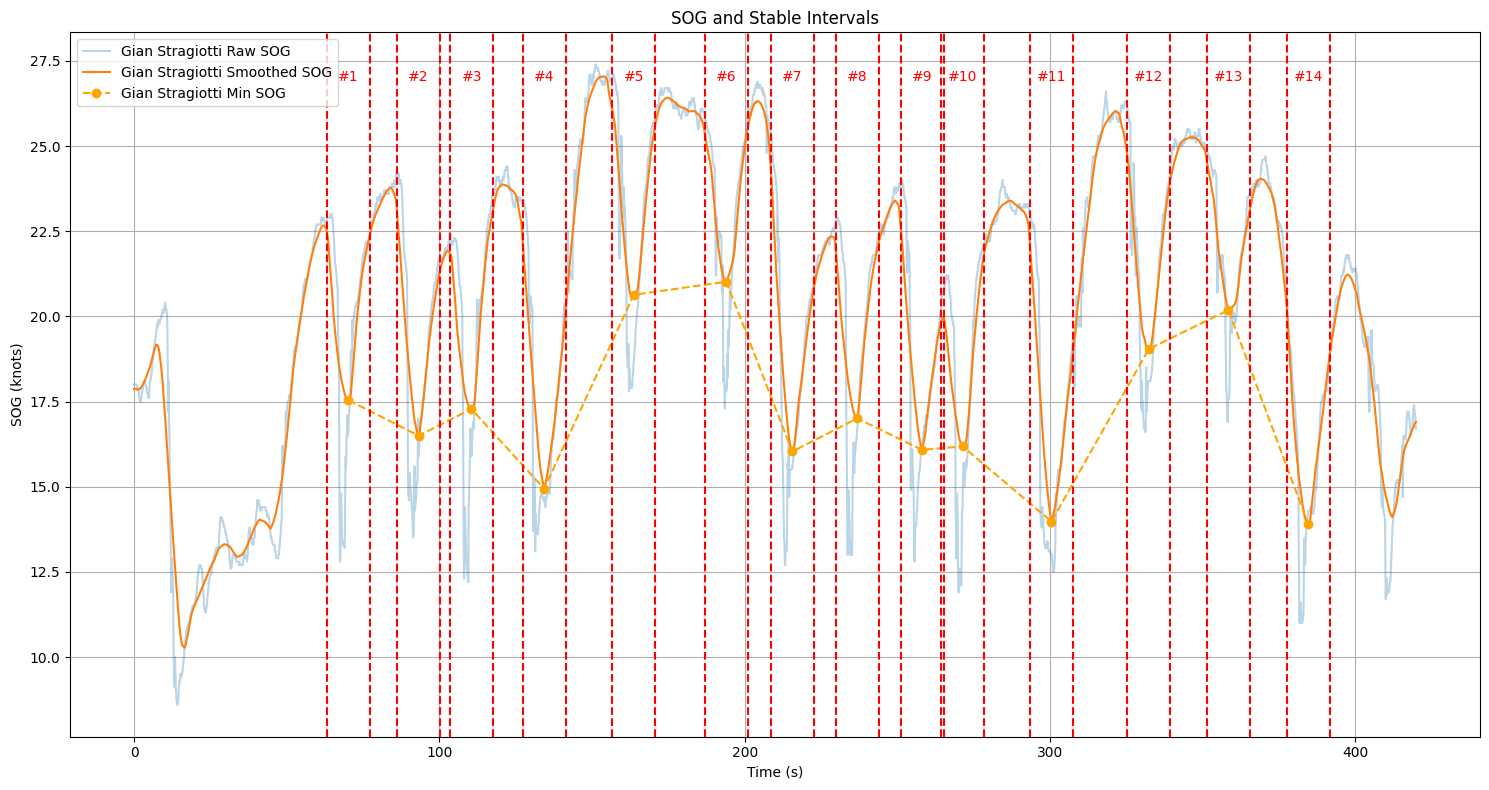

Skipped 2 maneuver(s) in Gian/11_06_Run1: indices: [7, 14]
Initial number of maneuvers: 14
Number of maneuvers selected: 12 






Analyse: Gian Stragiotti.csv dans ../Data_Sailnjord/Maneuvers\11_06\Gian\11_06_Run2


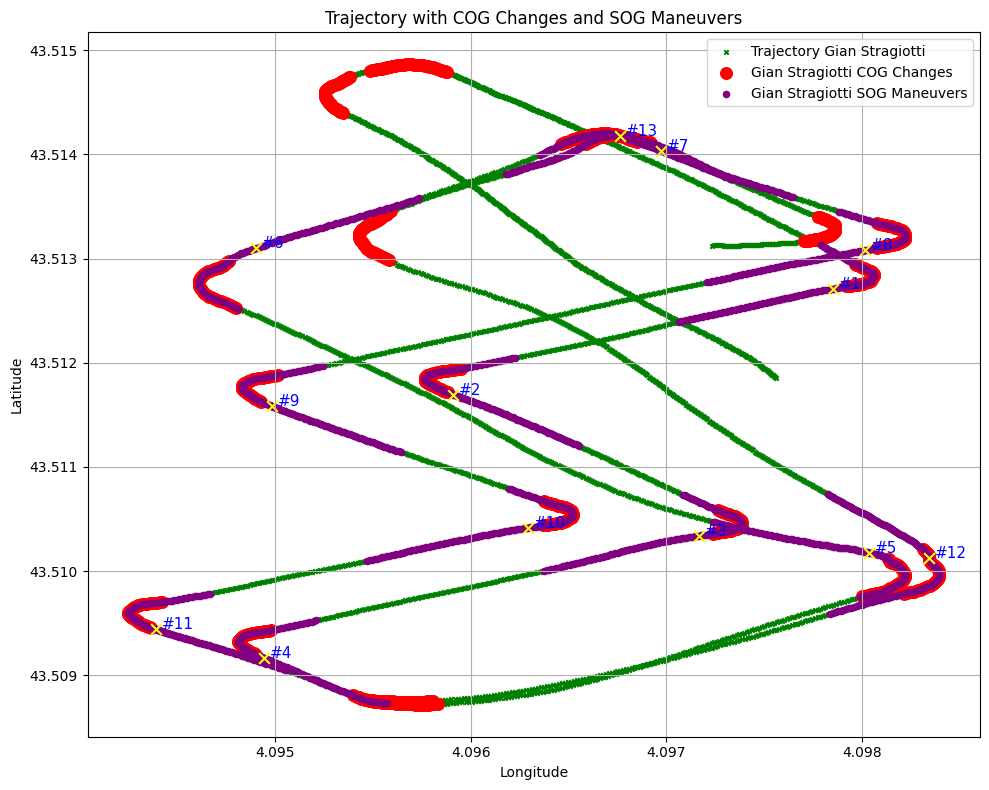

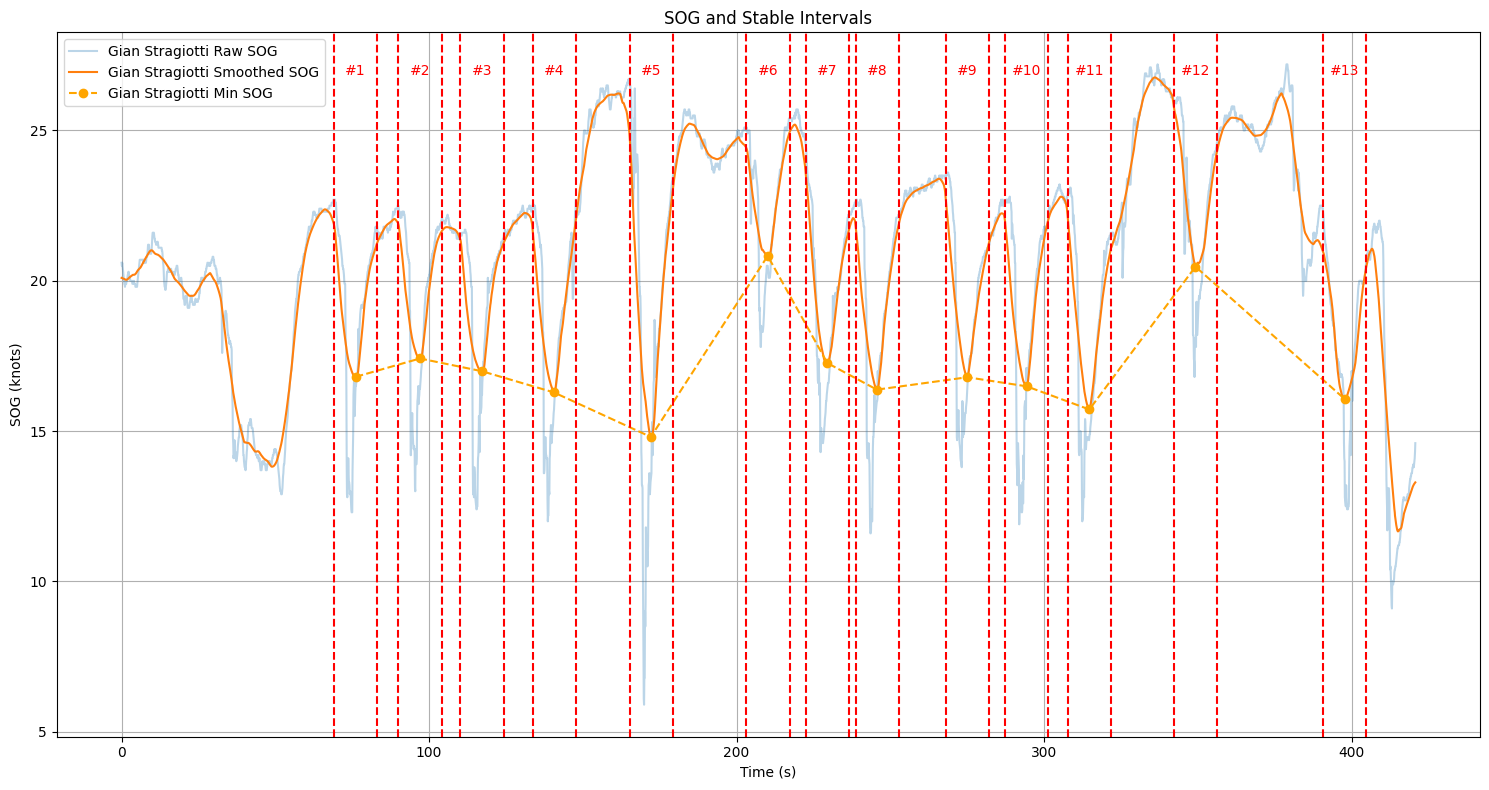

Skipped 2 maneuver(s) in Gian/11_06_Run2: indices: [7, 13]
Initial number of maneuvers: 13
Number of maneuvers selected: 11 






Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\11_06\Gian\11_06_Run3


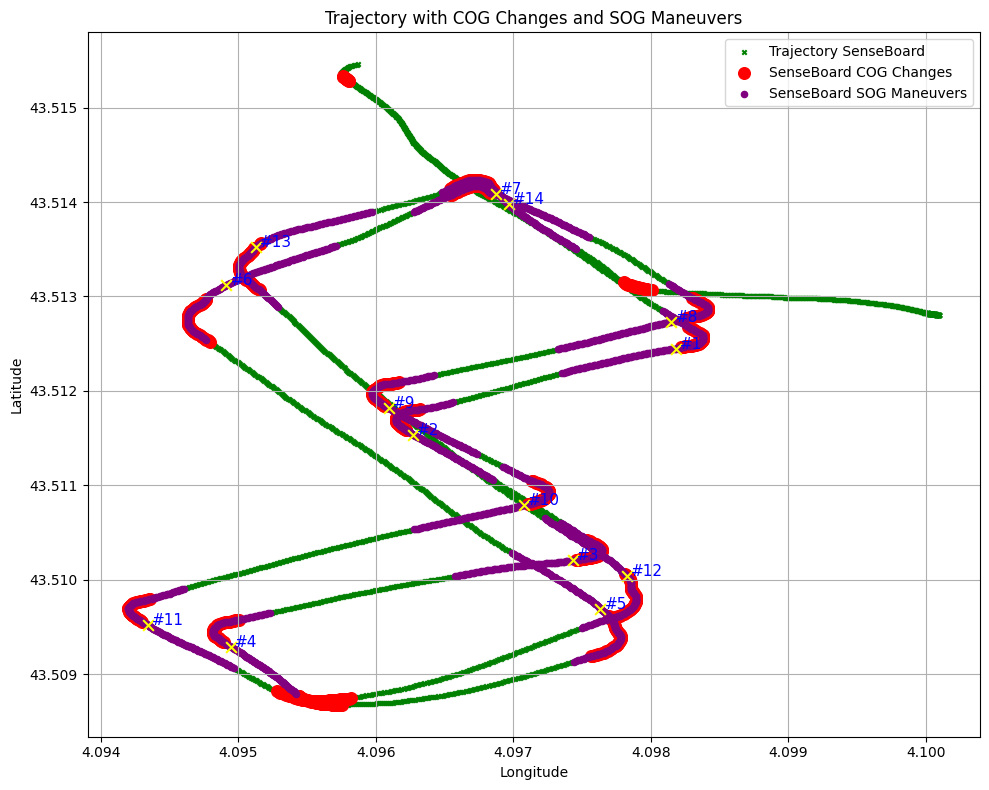

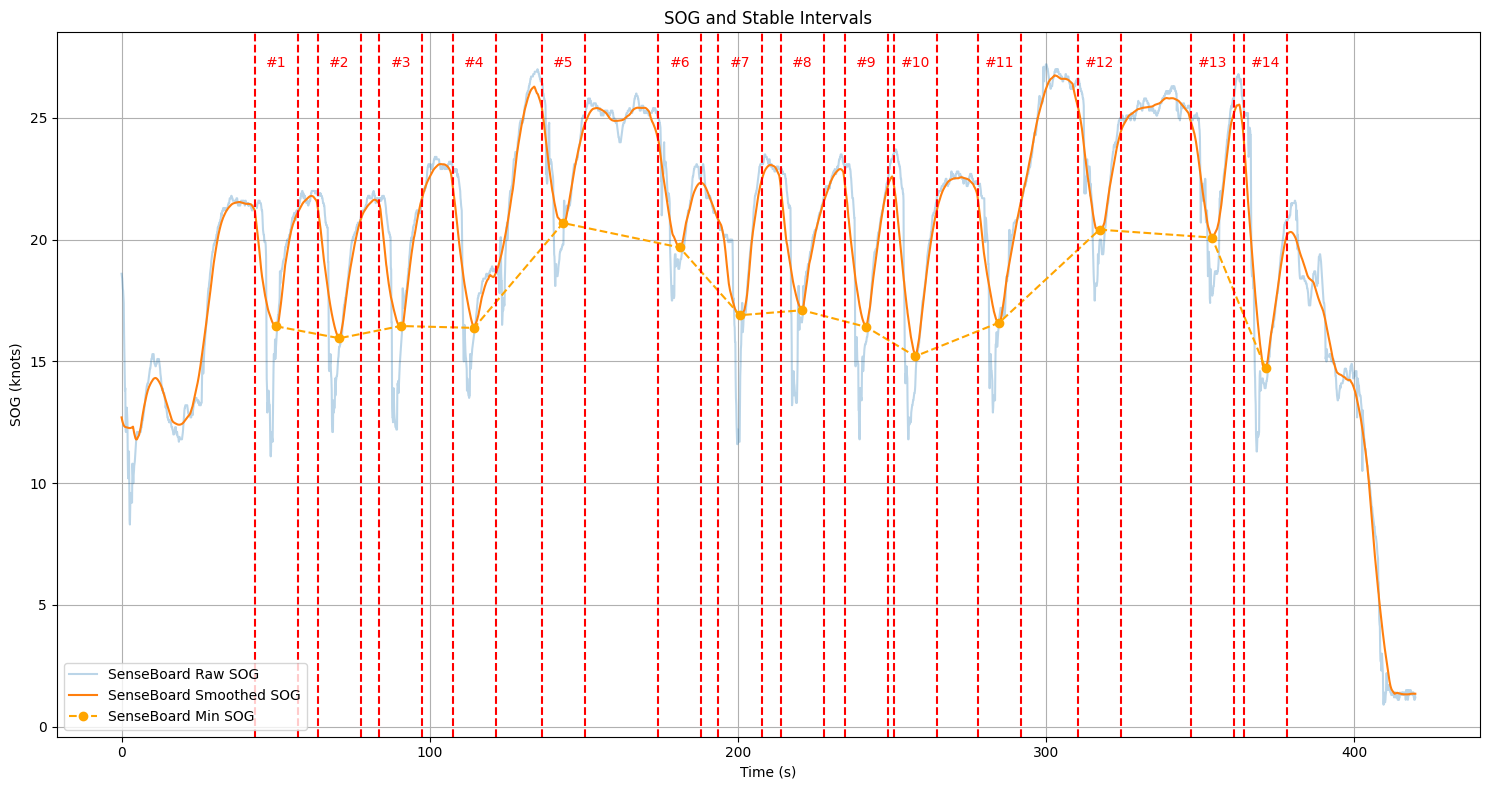

Skipped 2 maneuver(s) in Gian/11_06_Run3: indices: [7, 14]
Initial number of maneuvers: 14
Number of maneuvers selected: 12 






Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\11_06\Gian\11_06_Run4


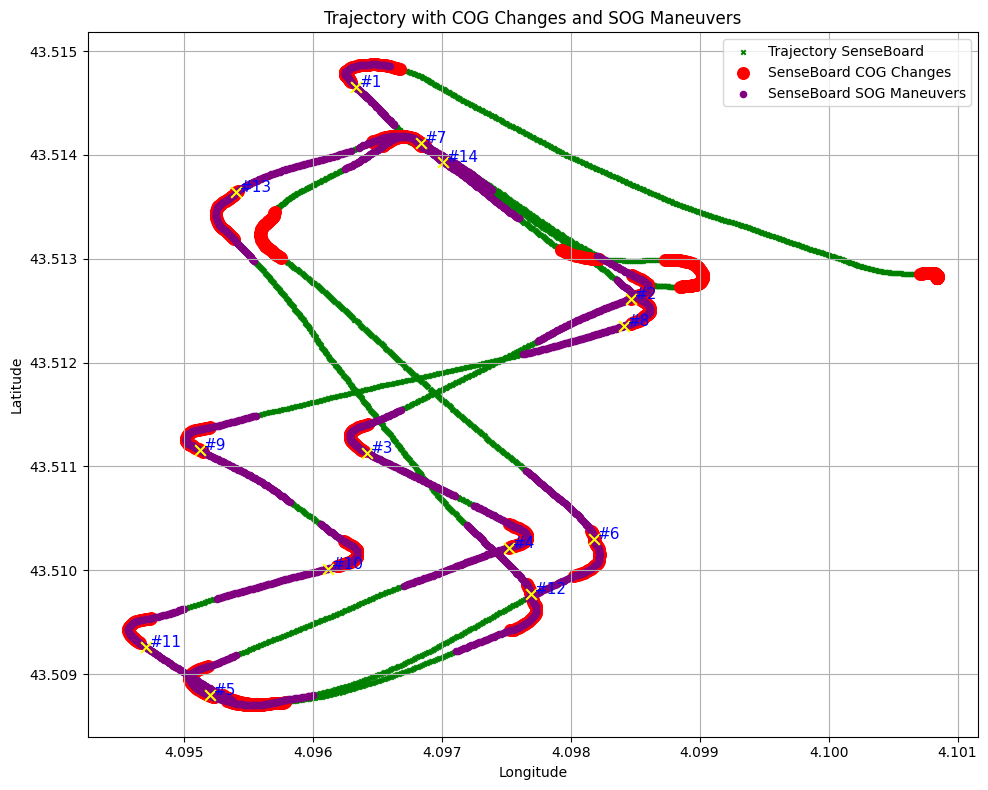

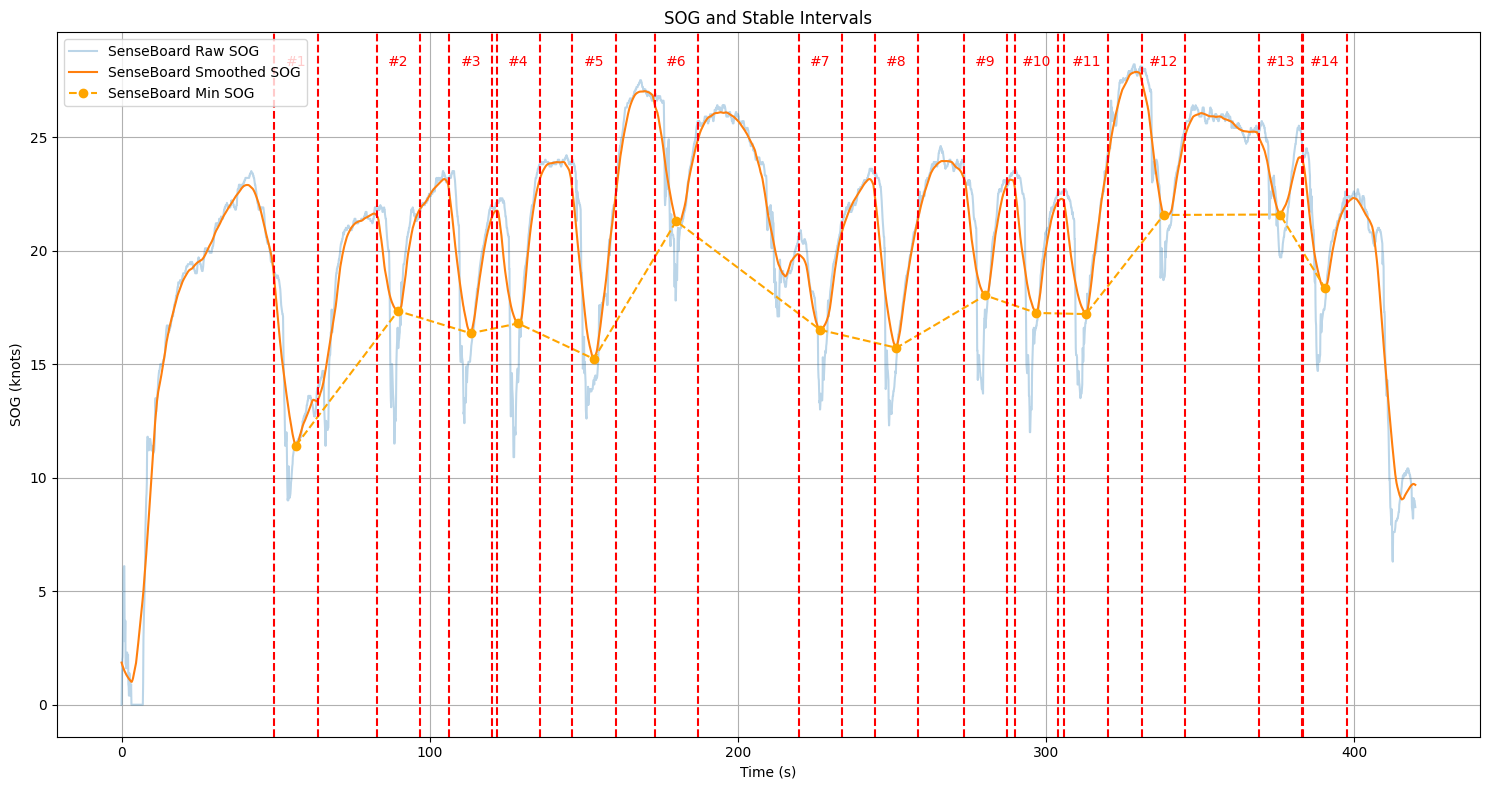

Skipped 3 maneuver(s) in Gian/11_06_Run4: indices: [1, 7, 14]
Initial number of maneuvers: 14
Number of maneuvers selected: 11 






Analyse: SenseBoard.csv dans ../Data_Sailnjord/Maneuvers\11_06\Gian\11_06_Run5


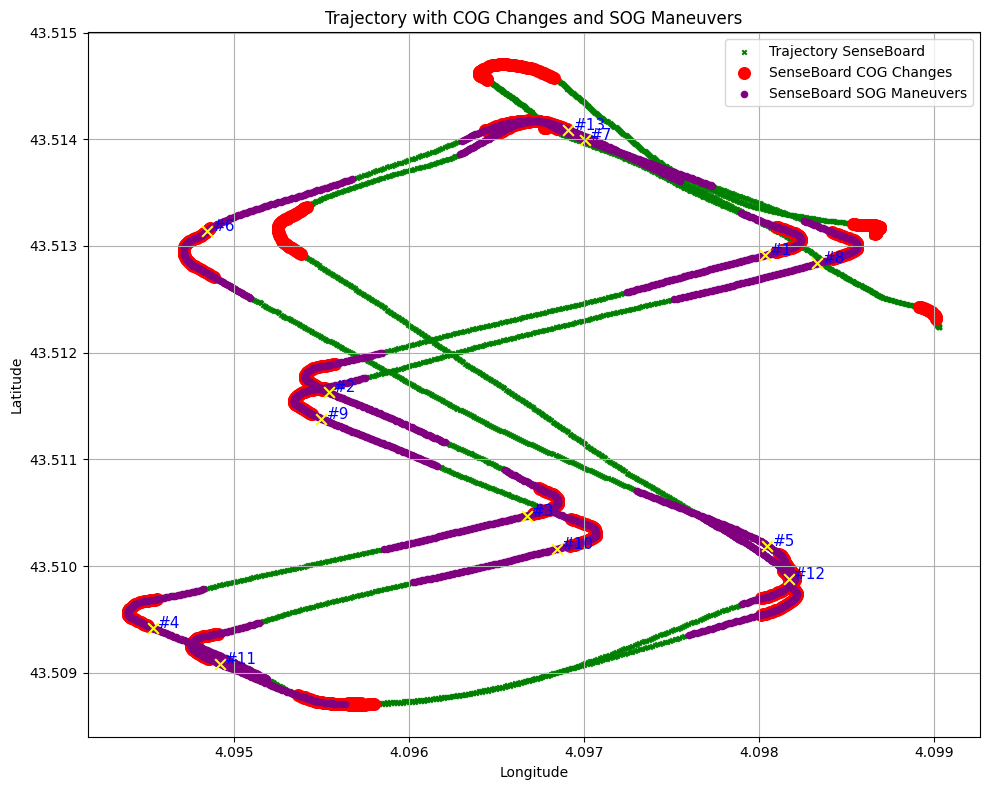

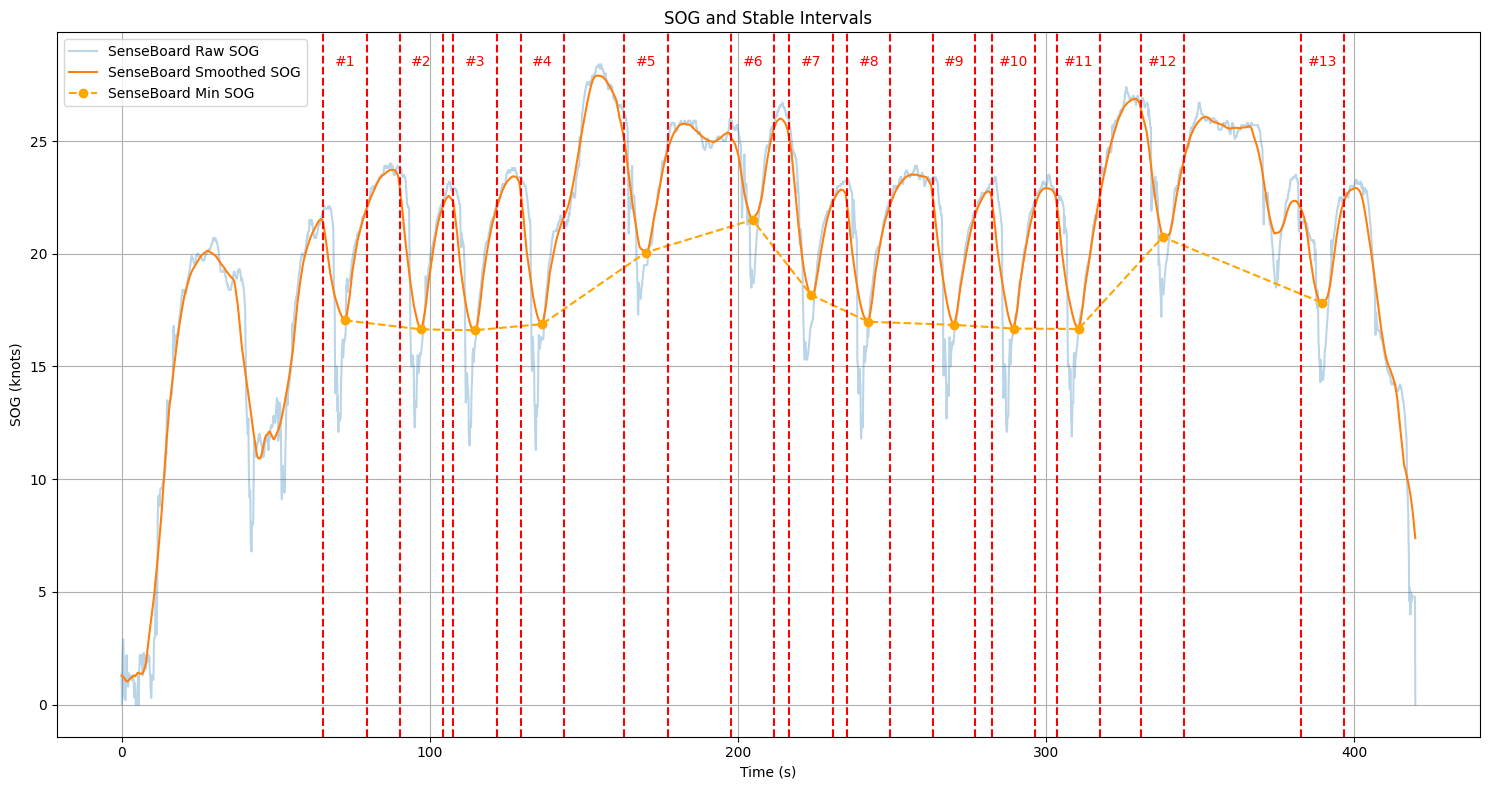

Skipped 2 maneuver(s) in Gian/11_06_Run5: indices: [7, 13]
Initial number of maneuvers: 13
Number of maneuvers selected: 11 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run1


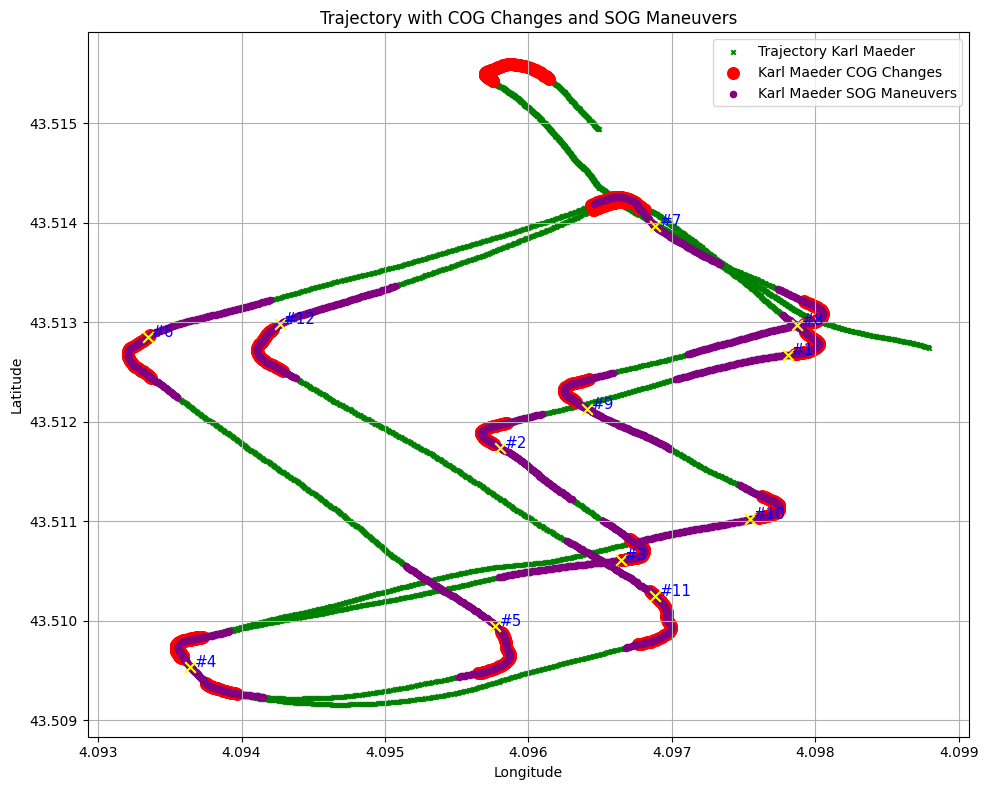

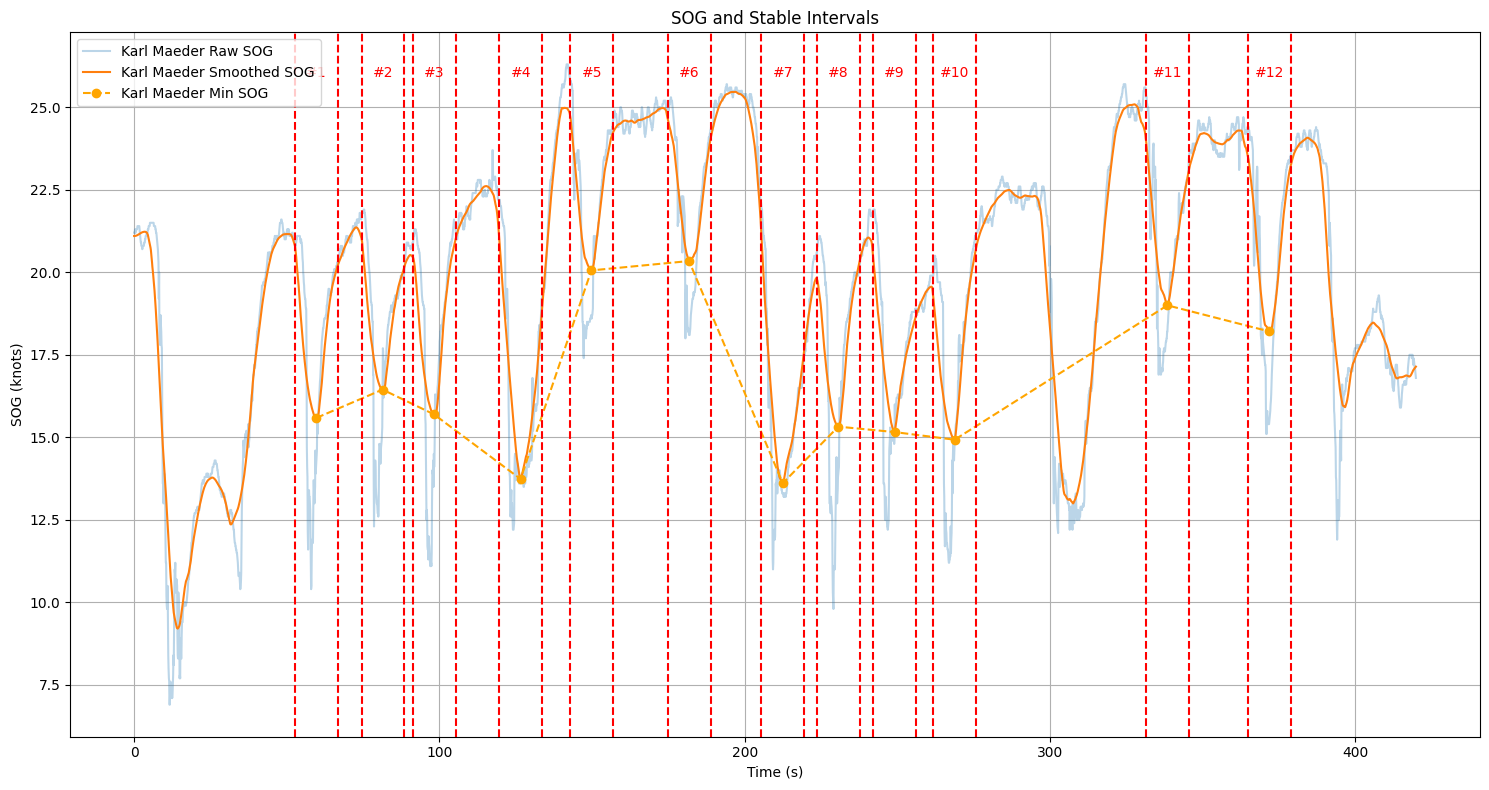

Skipped 1 maneuver(s) in Karl/11_06_Run1: indices: [7]
Initial number of maneuvers: 12
Number of maneuvers selected: 11 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run2


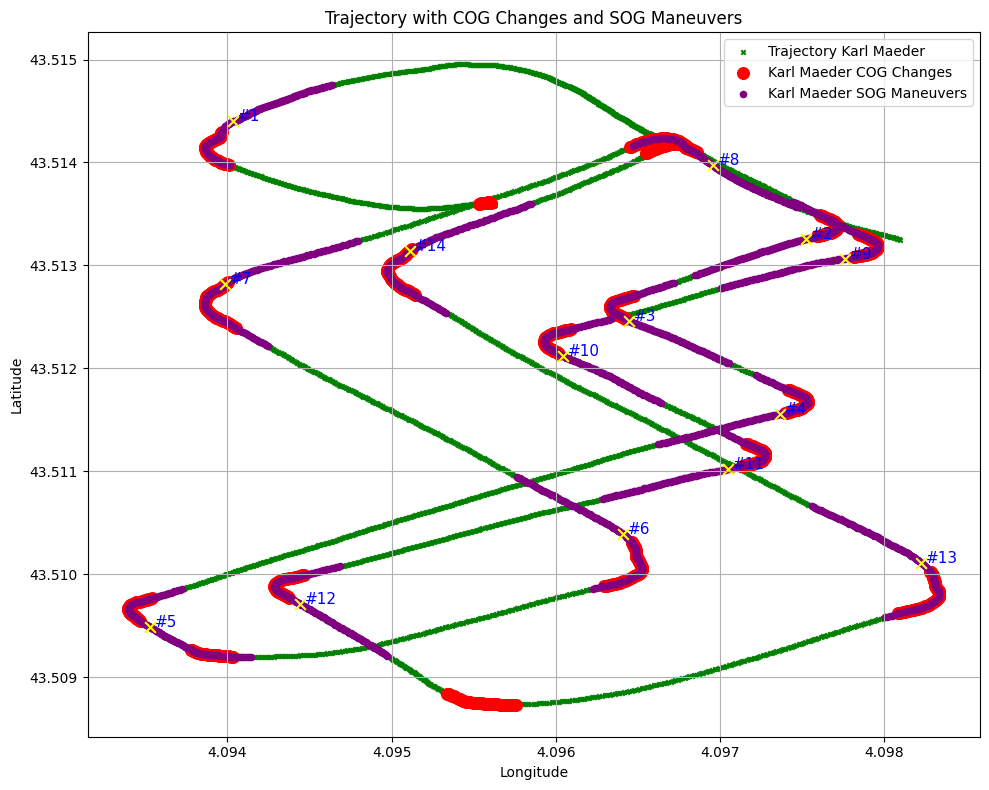

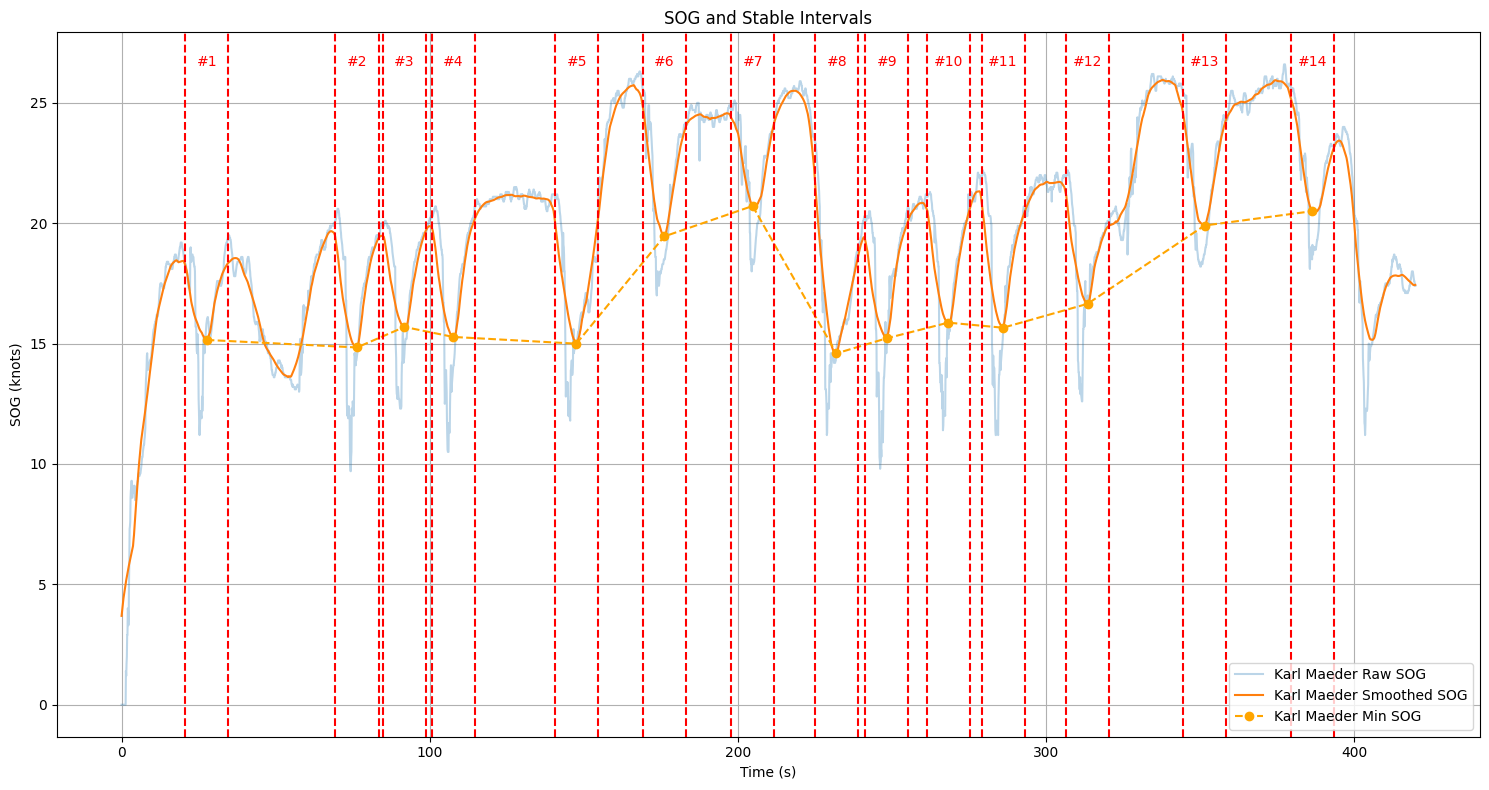

Skipped 2 maneuver(s) in Karl/11_06_Run2: indices: [1, 8]
Initial number of maneuvers: 14
Number of maneuvers selected: 12 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run3


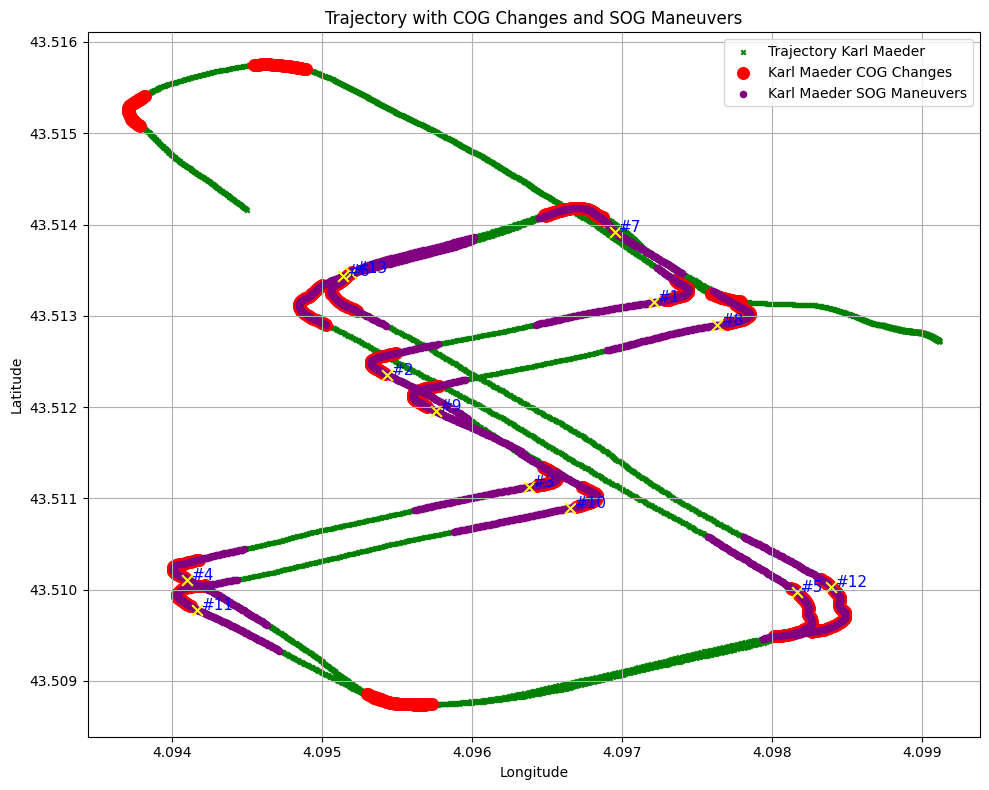

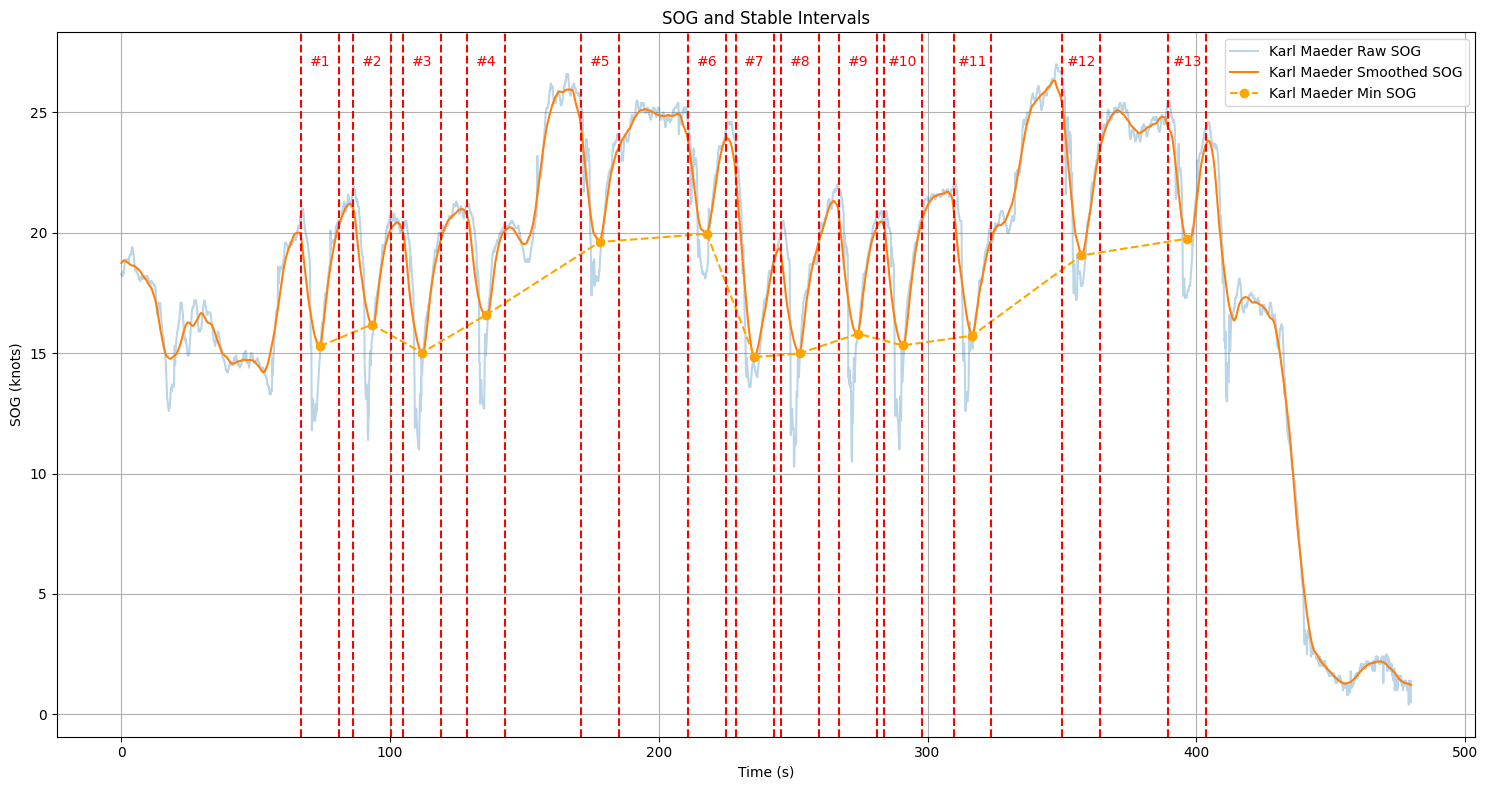

Skipped 1 maneuver(s) in Karl/11_06_Run3: indices: [7]
Initial number of maneuvers: 13
Number of maneuvers selected: 12 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run4


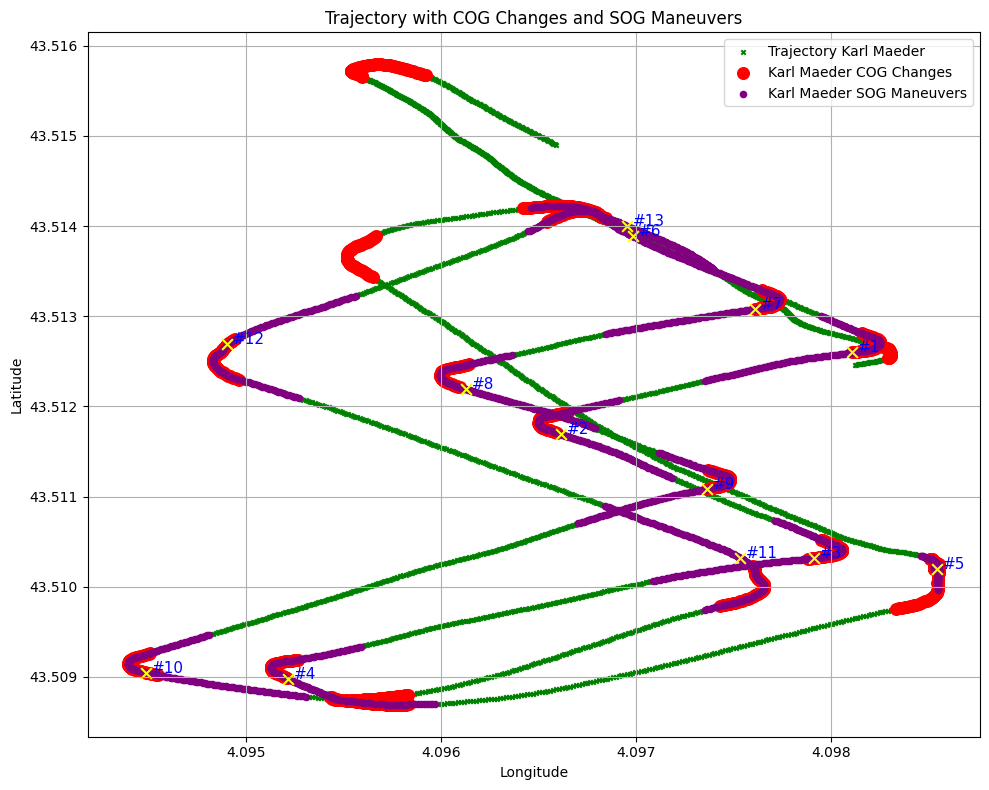

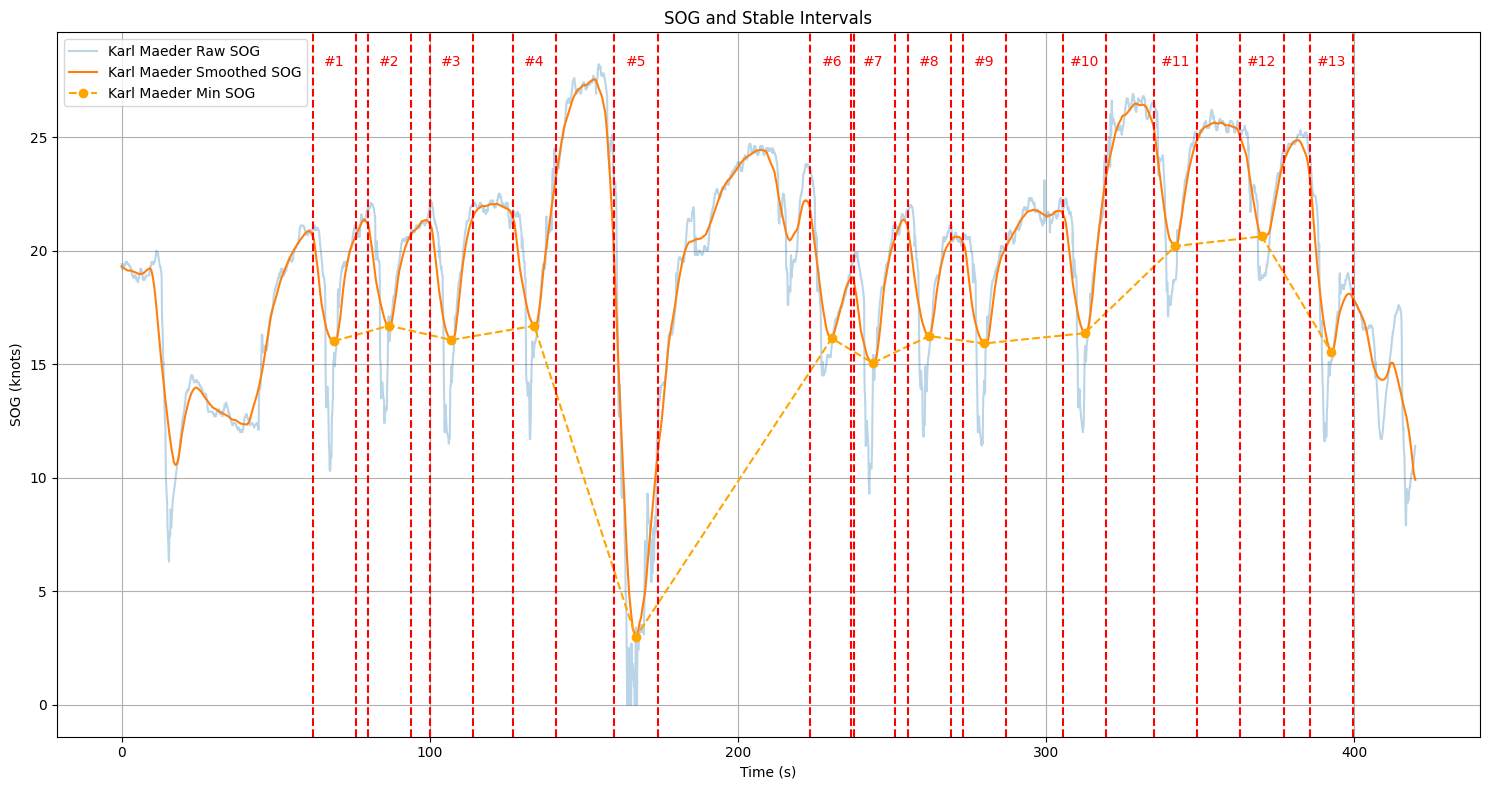

Skipped 3 maneuver(s) in Karl/11_06_Run4: indices: [5, 6, 13]
Initial number of maneuvers: 13
Number of maneuvers selected: 10 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run5


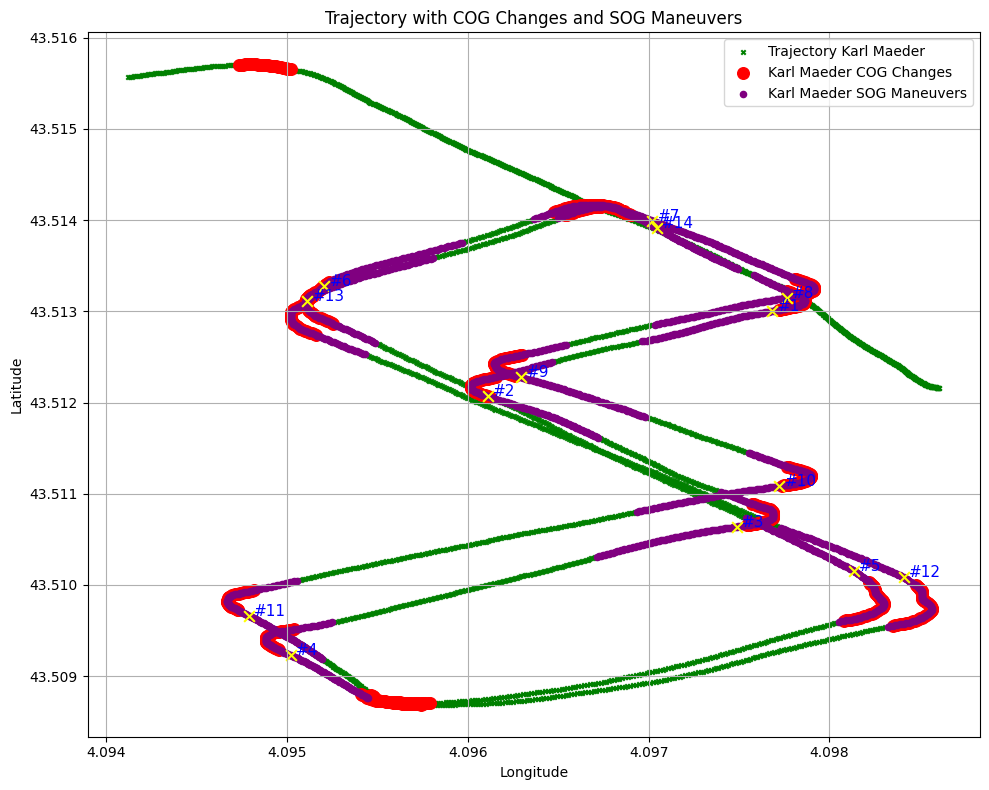

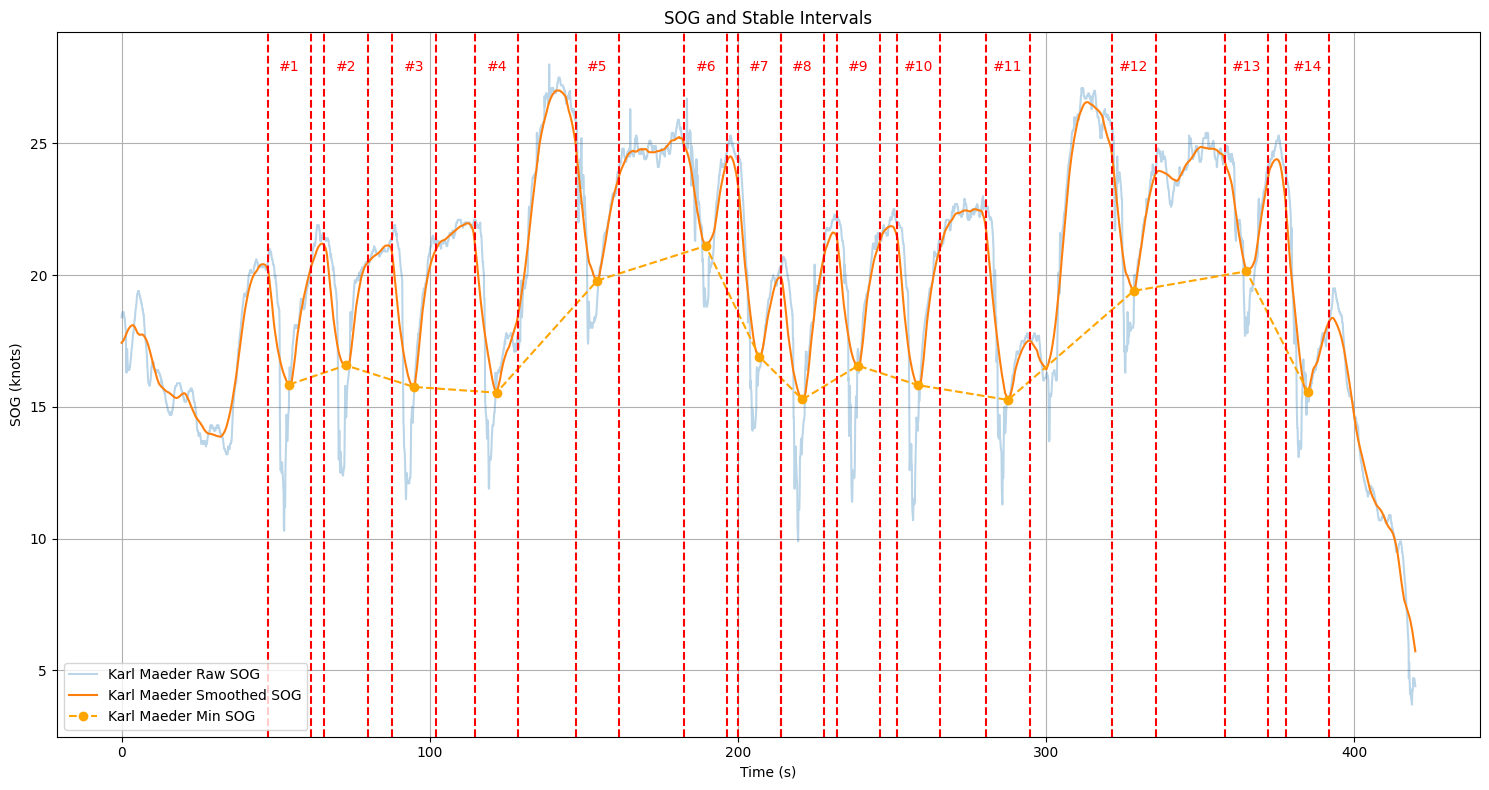

Skipped 2 maneuver(s) in Karl/11_06_Run5: indices: [7, 14]
Initial number of maneuvers: 14
Number of maneuvers selected: 12 






Analyse: Karl Maeder.csv dans ../Data_Sailnjord/Maneuvers\11_06\Karl\11_06_Run6


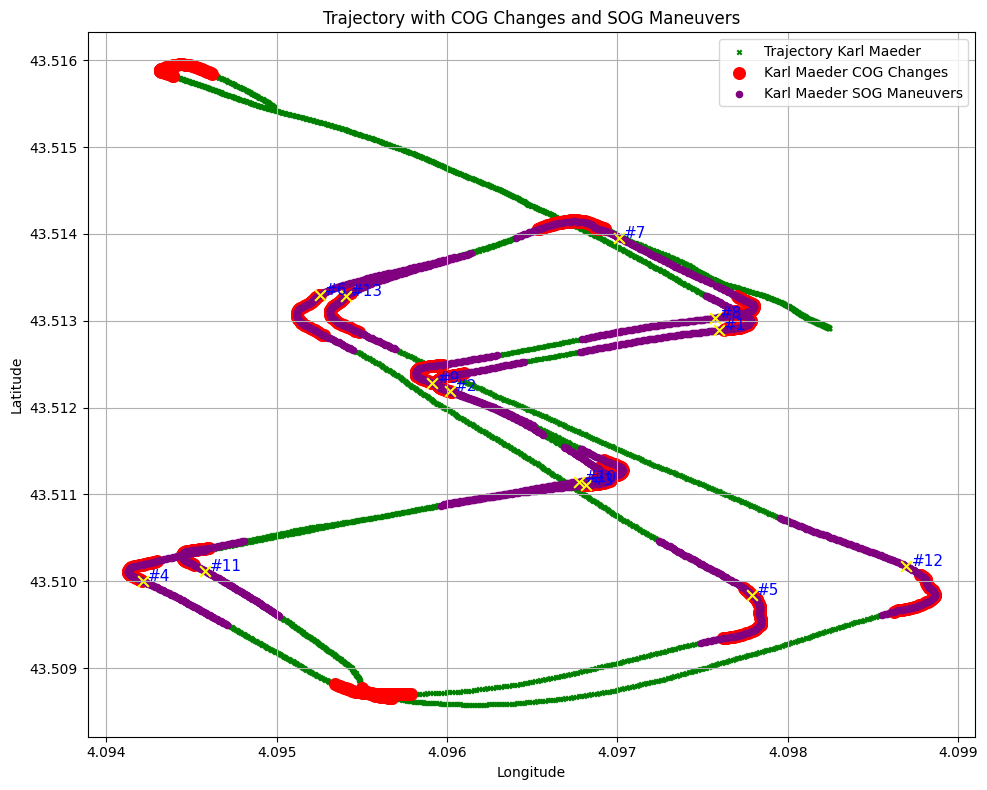

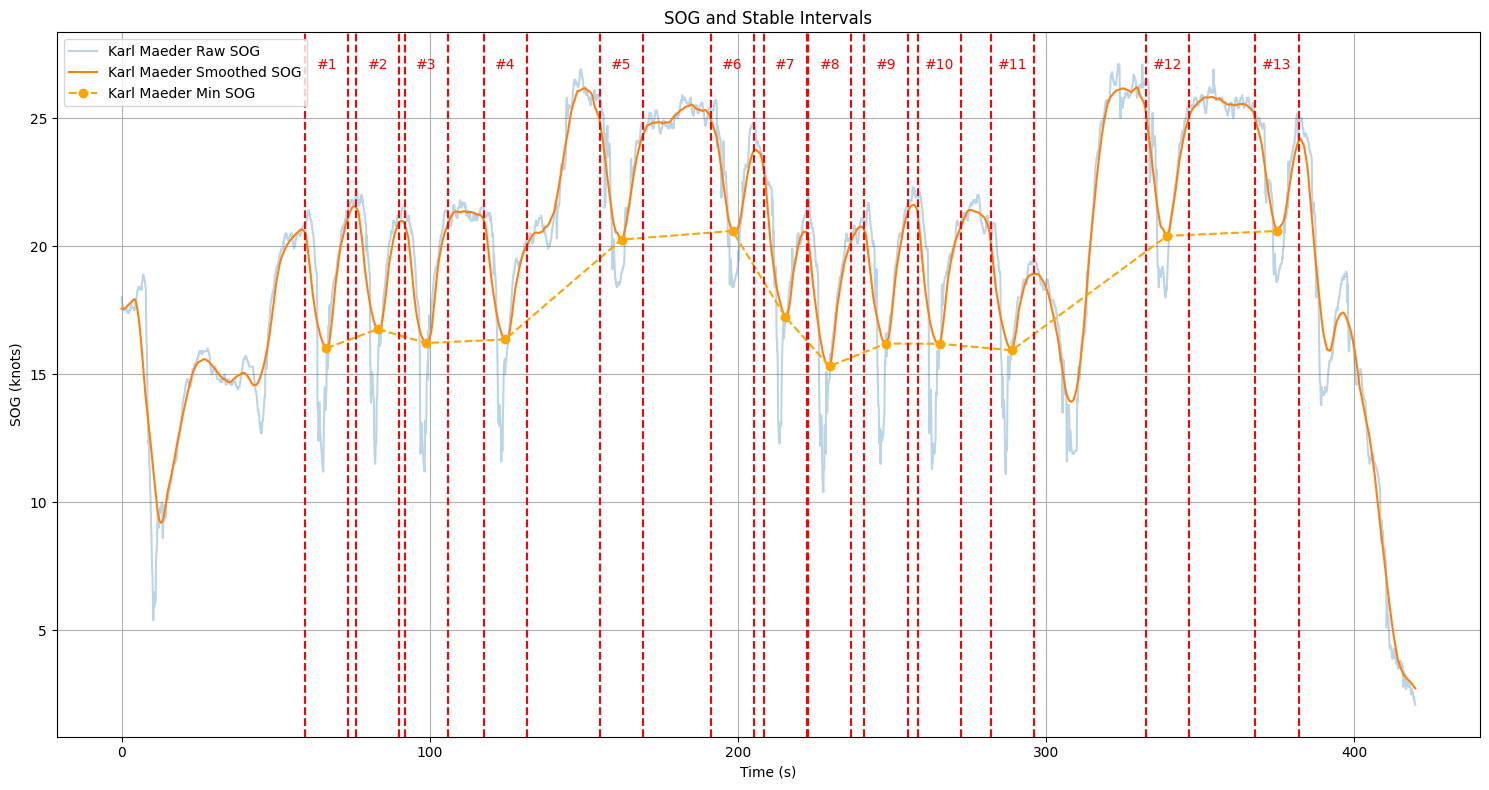

Skipped 1 maneuver(s) in Karl/11_06_Run6: indices: [7]
Initial number of maneuvers: 13
Number of maneuvers selected: 12 






Résumé complet sauvegardé (22 runs)


In [1]:
import os
import json
from cog_analysis import analyze_session
from natsort import natsorted

summary = []

# Format: { "person/run": [maneuver_index_to_skip, ...] }
manual_skips = {
    "Gian/08_06_Run1": [7,14],
    "Gian/08_06_Run2": [1,8,14],
    "Gian/08_06_Run3": [1,8,14],
    "Gian/08_06_Run4": [5,12],
    "Gian/08_06_Run5": [1,13],
    "Karl/08_06_Run1": [8],
    "Karl/08_06_Run2": [12],
    "Karl/08_06_Run3": [13],
    "Karl/08_06_Run4": [6],
    "Karl/08_06_Run5": [12],
    "Gian/11_06_Run1": [7,14],
    "Gian/11_06_Run2": [7,13],
    "Gian/11_06_Run3": [7,14],
    "Gian/11_06_Run4": [1,7,14],
    "Gian/11_06_Run5": [7,13],
    "Karl/11_06_Run1": [7],
    "Karl/11_06_Run2": [1,8],
    "Karl/11_06_Run3": [7],
    "Karl/11_06_Run4": [5,6,13],
    "Karl/11_06_Run5": [7,14],
    "Karl/11_06_Run6": [7]
    #exluding only hand-picked maneuvers
    #"Gian/08_06_Run2": [1],
    #"Gian/08_06_Run3": [1],
    #"Gian/08_06_Run5": [1],
    #"Gian/11_06_Run4": [1],
    #"Karl/11_06_Run2": [1],
    #"Karl/11_06_Run4": [5]
}

base_dir = "../Data_Sailnjord/Maneuvers"

# Parcours tous les dossiers de date
for date_folder in sorted(os.listdir(base_dir)):
    date_path = os.path.join(base_dir, date_folder)

    if not os.path.isdir(date_path):
        continue

    # Parcours tous les dossiers de personne dans chaque date
    for person_folder in sorted(os.listdir(date_path)):
        person_path = os.path.join(date_path, person_folder)

        if not os.path.isdir(person_path):
            continue

        # Parcours tous les dossiers de run dans chaque dossier de personne
        for run_folder in natsorted(os.listdir(person_path)):
            run_path = os.path.join(person_path, run_folder)

            if not os.path.isdir(run_path):
                continue

            # Cherche un fichier CSV dans le run
            csv_files = [f for f in os.listdir(run_path) if f.endswith(".csv")]
            if len(csv_files) != 1:
                print(f"Ignoré: {run_path} (attendu 1 CSV, trouvé {len(csv_files)})")
                continue

            csv_path = os.path.join(run_path, csv_files[0])
            print(f"Analyse: {csv_files[0]} dans {run_path}")
            try:
                intervals = analyze_session(
                    boat1_path=csv_path, 
                    boat2_path=None, 
                    cog_threshold=30.0, # detect_COG_changes_rolling_mean
                    window=30,  #detect_COG_changes_rolling_mean

                    sog_smoothing_window=75, #detect_maneuvers_from_sog_minima
                    sog_prominence=2, #detect_maneuvers_from_sog_minima
                    sog_min_duration=10.0, #detect_maneuvers_from_sog_minima
                    twa_threshold=90.0, #detect_maneuvers_from_sog_minima
                    cog_inversion_threshold=45.0, #detect_maneuvers_from_sog_minima
                    min_minima_distance=12.0, #detect_maneuvers_from_sog_minima
                    pre_window = 7.0, 
                    post_window = 7.0,
                    min_sog_entry_threshold = 18.0,

                    #Following parameters useless for maneuvers (only used when there is 2 boats to wompare)
                    top_n_intervals=2, # compute_longest_intervals 
                    min_duration_sec=40.0, #compute_longest_intervals
                    sog_derivative_threshold=0.3, #compute_longest_intervals
                    smoothing_window=100  #compute_longest_intervals
                )

                # Build key for skipping
                run_id = f"{person_folder}/{run_folder}"

                # Apply manual skip filter
                if run_id in manual_skips:
                    to_skip = manual_skips[run_id]
                    original_intervals = intervals.copy()
                    skipped = [m for m in original_intervals if m.get("maneuver_index") in to_skip]
                    intervals = [m for m in original_intervals if m.get("maneuver_index") not in to_skip]
                    if skipped:
                        skipped_str = ", ".join(str(m["maneuver_index"]) for m in skipped)
                        print(f"Skipped {len(skipped)} maneuver(s) in {run_id}: indices: [{skipped_str}]")
                        print(f"Initial number of maneuvers: {len(original_intervals)}")


                print(f"Number of maneuvers selected: {len(intervals)} \n\n\n\n\n\n")
                
                summary.append({
                    "date": date_folder,
                    "person": person_folder,
                    "run": run_folder,
                    "intervals": intervals
                })

            except Exception as e:
                import traceback
                print(f"❌ Erreur dans {run_path} : {type(e).__name__} - {e}")
                traceback.print_exc()


# Sauvegarde du résumé
summary_file = "summary.json"
with open(summary_file, "w") as f:
    json.dump(summary, f, indent=2)

print(f"Résumé complet sauvegardé ({len(summary)} runs)")


In [2]:
print(json.dumps(summary, indent=2))

[
  {
    "date": "08_06",
    "person": "Gian",
    "run": "08_06_Run1",
    "intervals": [
      {
        "maneuver_index": 1,
        "maneuver_time": 1749369722.957,
        "maneuver_type": "Tack",
        "duration": 14.0,
        "start_time": 1749369716.072,
        "end_time": 1749369730.072
      },
      {
        "maneuver_index": 2,
        "maneuver_time": 1749369738.263,
        "maneuver_type": "Tack",
        "duration": 13.911999940872192,
        "start_time": 1749369731.355,
        "end_time": 1749369745.267
      },
      {
        "maneuver_index": 3,
        "maneuver_time": 1749369753.357,
        "maneuver_type": "Tack",
        "duration": 14.08400011062622,
        "start_time": 1749369746.36,
        "end_time": 1749369760.444
      },
      {
        "maneuver_index": 4,
        "maneuver_time": 1749369772.556,
        "maneuver_type": "Tack",
        "duration": 14.002000093460083,
        "start_time": 1749369765.556,
        "end_time": 1749369779.558
